In [62]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### First prepare the json so that the rating is formatted better

In [63]:
# with open('completed_perfumes.json', 'r', encoding='utf-8') as f:
#     big_dict = json.load(f)


# for idx, list_element in enumerate(big_dict):

#     detailed_ratings = big_dict[idx]['detailed_ratings']

#     for typ, rating_list in detailed_ratings.items():
#         buf_dic = {}
#         if rating_list is not None:
#             for rating_element in rating_list:
#                 buf_dic[rating_element['r']] = rating_element['v']
#             detailed_ratings[typ] = buf_dic
#         else:
#             detailed_ratings[typ] = None 


#     big_dict[idx]['detailed_ratings'] = detailed_ratings

# df = pd.json_normalize(big_dict)

**Take a look at an example element**

In [64]:
# df[df['name'] == 'Khamrah']

**Remove the arabic letters to avoid formatting issues**

In [65]:
# # strip of arabic name to have it cleaner
# df['brand'] = df['brand'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
# df[df['name'] == 'Khamrah']

**Set the nonexisting scenttypes to 0**

In [66]:
# df.loc[:, df.filter(like='scent_types.').columns] = df.filter(like='scent_types.').fillna(0)

**remove some unnecessary parts in the column names**

In [67]:
# df = df.drop(df.filter(regex='^scent_strength').columns, axis=1)

# df.columns = df.columns.str.replace(r'^[^.]+\.', '', regex=True)

# pd.set_option('display.max_columns', None)  # Show all columns
# print(df.columns)

**map all the top head and base notes to the column with all notes**

In [68]:
# df["all_notes"] = df.apply(lambda row: 
#     (row["top_notes"] or []) + (row["middle_notes"] or []) + (row["base_notes"] or []), axis=1
# )

In [69]:
# old_df = pd.read_pickle('old_database.pkl')
# old_df.head()

In [70]:
# import pandas as pd

# # Merge on the common URL column
# df = df.merge(
#     old_df[['Parfumo_Link', 'Name', 'Designer']],  # Select only relevant columns
#     left_on='url', right_on='Parfumo_Link', how='left'
# )

# # Fill missing values in `name` and `brand` columns using the values from dataframe2
# df['name'].fillna(df['Name'], inplace=True)
# df['brand'].fillna(df['Designer'], inplace=True)

# # Drop unnecessary columns
# df.drop(columns=['Parfumo_Link', 'Name', 'Designer'], inplace=True)

# # Rename columns to original names
# # merged_df.rename(columns={'name_x': 'name', 'brand_x': 'brand'}, inplace=True)

# # Resulting dataframe1 with missing values filled
# print(df)

**Save to excel**

In [71]:
# df.to_excel("perfumes.xlsx", sheet_name="Sheet1", index=False)
# df.to_csv('perfumes.csv')
# df.to_pickle('perfumes.pkl')

In [72]:
df = pd.read_pickle('data/perfumes.pkl')

**Search for perfumes that fulfill certain criteria**

In [113]:
KRITERIUM = 'Aquatisch'
ANZ_DUFT_RATINGS = 100
crit =  KRITERIUM 
duft = 'Duft' + '.rating'
duft_ratings = 'Duft' + '.number_of_ratings'
haltbarkeit = 'Haltbarkeit' + '.rating'
sillage = 'Sillage' + '.rating'

filtered_df = df[
    (df[duft] > 7.0) & 
    (df[haltbarkeit] > 7.0) & 
    (df[sillage] > 7.0) & 
    (df[duft_ratings] > ANZ_DUFT_RATINGS)
    ].sort_values(by=crit, ascending=False)

# Select specific columns and show the first 10 rows
result = filtered_df[['name', 'brand', crit, duft, haltbarkeit, sillage, 'url']].head(20)

# Print result
pd.set_option('display.width', 350)  # Set the max width (adjust as needed)
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
pd.set_option("display.max_colwidth", None)
print(result)
# result

                                                  name               brand  Aquatisch  Duft.rating  Haltbarkeit.rating  Sillage.rating                                                                        url
1358                                          Megamare         Orto Parisi      32.36          7.4                 9.5             9.3                        https://www.parfumo.de/Parfums/Orto_Parisi/Megamare
9923                                     Acqua di Sale       Profumum Roma      30.97          7.7                 8.7             8.1                 https://www.parfumo.de/Parfums/Profumum_Roma/Acqua_di_Sale
9924                                     Acqua di Sale       Profumum Roma      30.97          7.7                 8.7             8.1                 https://www.parfumo.de/Parfums/Profumum_Roma/Acqua_di_Sale
14344                                        Black Sea   Lorenzo Pazzaglia      30.84          8.3                 9.1             8.6                 https://w

In [114]:
df[(df['Duft.rating'] > 7.8) & (df['Haltbarkeit.rating'] > 7.7) & ('Meeresbrise' in df['all_notes']) ].sort_values(by='Duft.rating', ascending=False).head(10)

Empty DataFrame
Columns: [name, brand, year, collection, flakon_designer, perfumer, top_notes, middle_notes, base_notes, all_notes, url, Duft.rating, Duft.number_of_ratings, Haltbarkeit.rating, Haltbarkeit.number_of_ratings, Sillage.rating, Sillage.number_of_ratings, Flakon.rating, Flakon.number_of_ratings, Preis-Leistungs-Verhältnis.rating, Preis-Leistungs-Verhältnis.number_of_ratings, scent.0, scent.1, scent.2, scent.3, scent.4, scent.5, scent.6, scent.7, scent.8, scent.9, scent.10, durability.0, durability.1, durability.2, durability.3, durability.4, durability.5, durability.6, durability.7, durability.8, durability.9, durability.10, sillage.0, sillage.1, sillage.2, sillage.3, sillage.4, sillage.5, sillage.6, sillage.7, sillage.8, sillage.9, sillage.10, bottle.0, bottle.1, bottle.2, bottle.3, bottle.4, bottle.5, bottle.6, bottle.7, bottle.8, bottle.9, bottle.10, pricing.0, pricing.1, pricing.2, pricing.3, pricing.4, pricing.5, pricing.6, pricing.7, pricing.8, pricing.9, pricing.10, Zitrus, Würzig, Grün, Fruchtig, Frisch, Blumig, Herren, Damen, Klassisch, Modern, Winter, Herbst, Sommer, Frühling, Täglich, Sport, Freizeit, Ausgehen, Arbeit, Abend, pricing, Synthetisch, Süß, Holzig, ...]
Index: []

---

#### Let's test out some plots

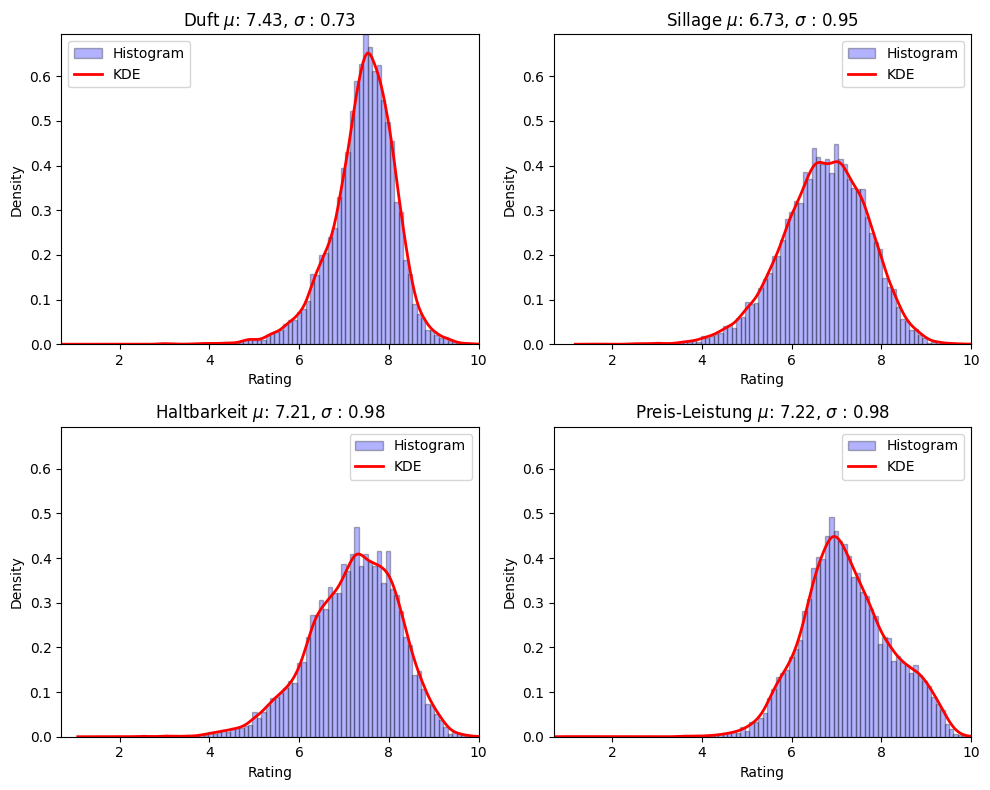

In [74]:
col_data = {
    "Duft": np.array(df['Duft.rating'].dropna()),
    "Sillage": np.array(df['Sillage.rating'].dropna()),
    "Haltbarkeit": np.array(df['Haltbarkeit.rating'].dropna()),
    "Preis-Leistung": np.array(df['Preis-Leistungs-Verhältnis.rating'].dropna())
}

# Create 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array
axes = axes.flatten()

def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Combine all ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find highest density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Plot density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # Plot KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title} ' + r'$\mu$' +  f': {data.mean():.2f}, ' + r'$\sigma$' + f' : {data.std():.2f}')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Density')

    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

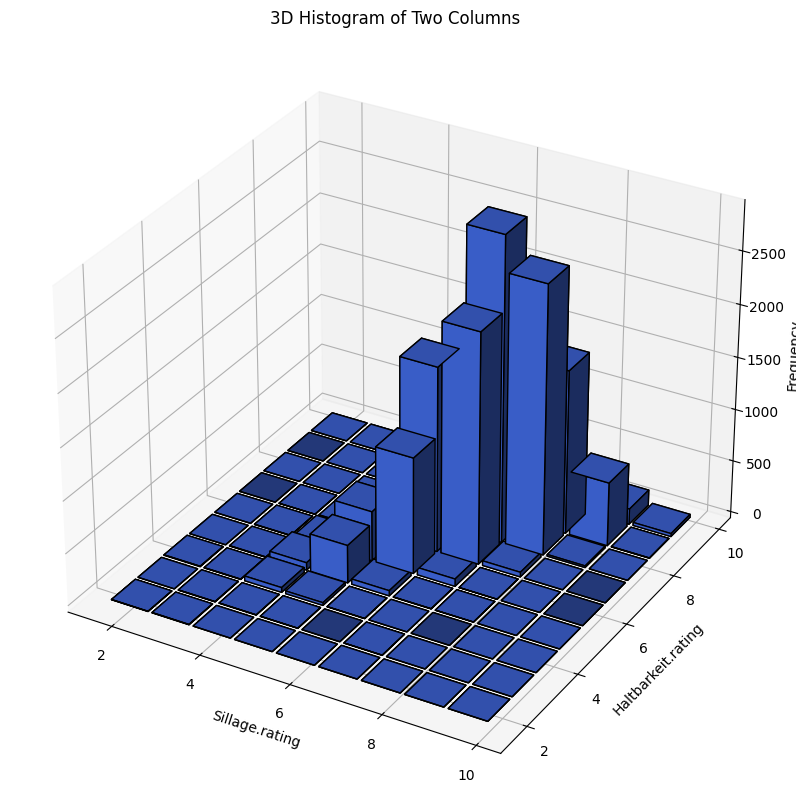

In [75]:
# Define bins
CRIT1 = 'Sillage.rating'
CRIT2 = 'Haltbarkeit.rating'
NO_BINS = 10

x_bins = np.linspace(df[CRIT1].min(), df[CRIT2].max(), NO_BINS)  # 10 bins
y_bins = np.linspace(df[CRIT1].min(), df[CRIT2].max(), NO_BINS)

# Compute 2D histogram
hist, x_edges, y_edges = np.histogram2d(df[CRIT1], df[CRIT2], bins=[x_bins, y_bins])

# Create figure
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Prepare bar positions
x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

# Bar dimensions
dx = dy = (x_bins[1] - x_bins[0]) * 0.9  # Make bars slightly smaller than bin width
dz = hist.ravel()  # Heights of bars (frequency counts)

# Plot 3D histogram
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True, color="royalblue", edgecolor="black")

# Labels
ax.set_xlabel(CRIT1)
ax.set_ylabel(CRIT2)
ax.set_zlabel("Frequency")
ax.set_title("3D Histogram of Two Columns")

plt.show()

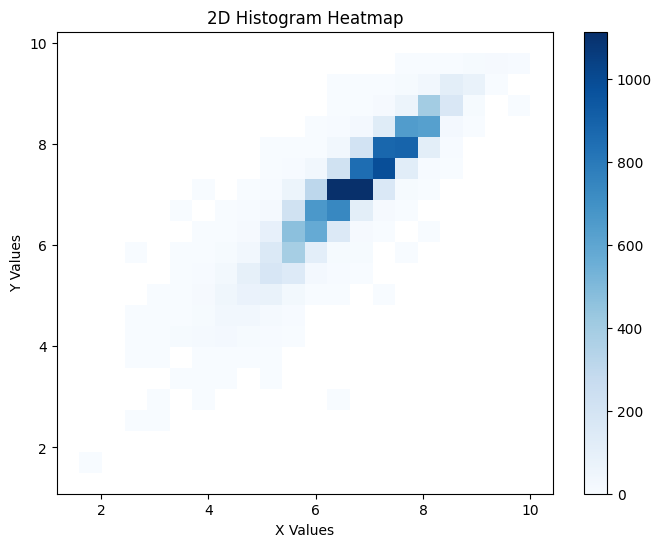

In [76]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x=CRIT1, y=CRIT2, bins=20, cmap="Blues", cbar=True)

# Labels
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("2D Histogram Heatmap")

plt.show()

#### Let's take a look at the performance of some perfumers

In [77]:
filtered_scores = df.loc[df['perfumer'] == 'Anne Flipo', 'Duft.rating']
print(len(filtered_scores))

79


##### Brands

Brand Counts: {'Guerlain': 151, 'Tom Ford': 135, 'Zara': 135, 'Giorgio Armani': 103, 'Dior': 78, 'Prada': 76, 'XerJoff': 72, 'Yves Saint Laurent': 72, 'Jil Sander': 69, 'Serge Lutens': 68, 'Calvin Klein': 66, 'Amouage': 63, 'Lancme': 61, 'Mugler': 60, 'Hugo Boss': 59, 'Dolce  Gabbana': 57, 'Rabanne': 55, 'Gucci': 55, 'Bvlgari': 55, 'Tiziana Terenzi': 53, 'Givenchy': 52, 'Yves Rocher': 52, 'Issey Miyake': 49, 'Herms': 49, 'Roja Parfums': 48, 'Tokyomilk': 48, 'Tom Tailor': 48, 'Playboy': 48, 'Jean Paul Gaultier': 48, 'Kenzo': 48, 'Profumum Roma': 46, 'Shiseido': 46, 'Penhaligons': 45, 'Police': 45, 'Jo Malone': 45, 'Tous': 44, 'Chanel': 43, 'Shay  Blue': 42, 'Tocca': 42, 'Kilian': 42, 'Montale': 42, 'The Woods Collection': 42, 'Profumi del Forte': 42, 'Thomas Kosmala': 40, 'M Micallef': 39, 'Prin': 38, 'Cartier': 38, 'Toskovat': 37, 'Acqua di Parma': 37, 'Azzaro': 36, 'Davidoff': 36, 'Narciso Rodriguez': 35, 'Burberry': 35, 'Tommy Bahama': 35, 'Maison Francis Kurkdjian': 35, 'Areej Le Do

Text(0.5, 1.0, 'Perfume Count by Brand')

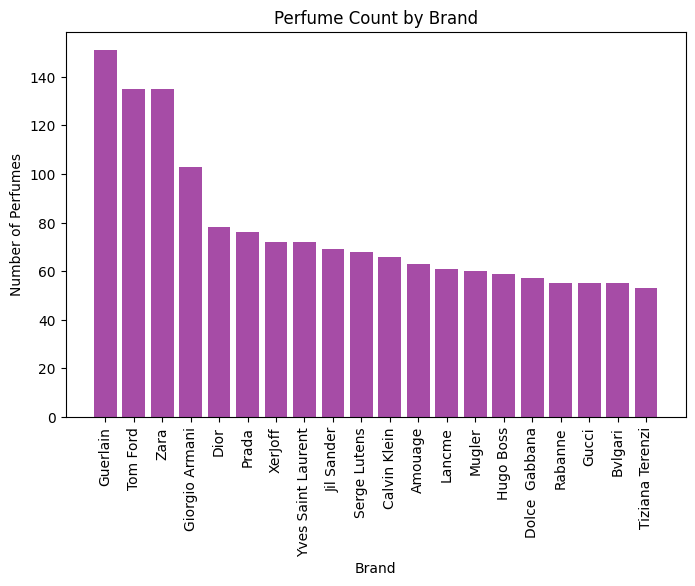

In [78]:
brand_counts = df['brand'].value_counts().to_dict()
# Get the top 4 perfumers
top_4_brands = dict(sorted(brand_counts.items(), key=lambda x: x[1], reverse=True)[:4])

print("Brand Counts:", brand_counts)
print("Top 4 Brands:", top_4_brands)

brand = list(brand_counts.keys())
b_counts = list(brand_counts.values())

top = 20
# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(brand[:top], b_counts[:top], color='purple', alpha=0.7)

# Labels and title
plt.xlabel('Brand')
plt.ylabel('Number of Perfumes')
plt.xticks(rotation=90)

plt.title('Perfume Count by Brand')

In [79]:
df.loc[df['brand'] == 'Xerjoff', 'Duft.rating'].dropna()

Series([], Name: Duft.rating, dtype: float64)

In [80]:
brand[:20]

['Guerlain',
 'Tom Ford',
 'Zara',
 'Giorgio Armani',
 'Dior',
 'Prada',
 'XerJoff',
 'Yves Saint Laurent',
 'Jil Sander',
 'Serge Lutens',
 'Calvin Klein',
 'Amouage',
 'Lancme',
 'Mugler',
 'Hugo Boss',
 'Dolce  Gabbana',
 'Rabanne',
 'Gucci',
 'Bvlgari',
 'Tiziana Terenzi']

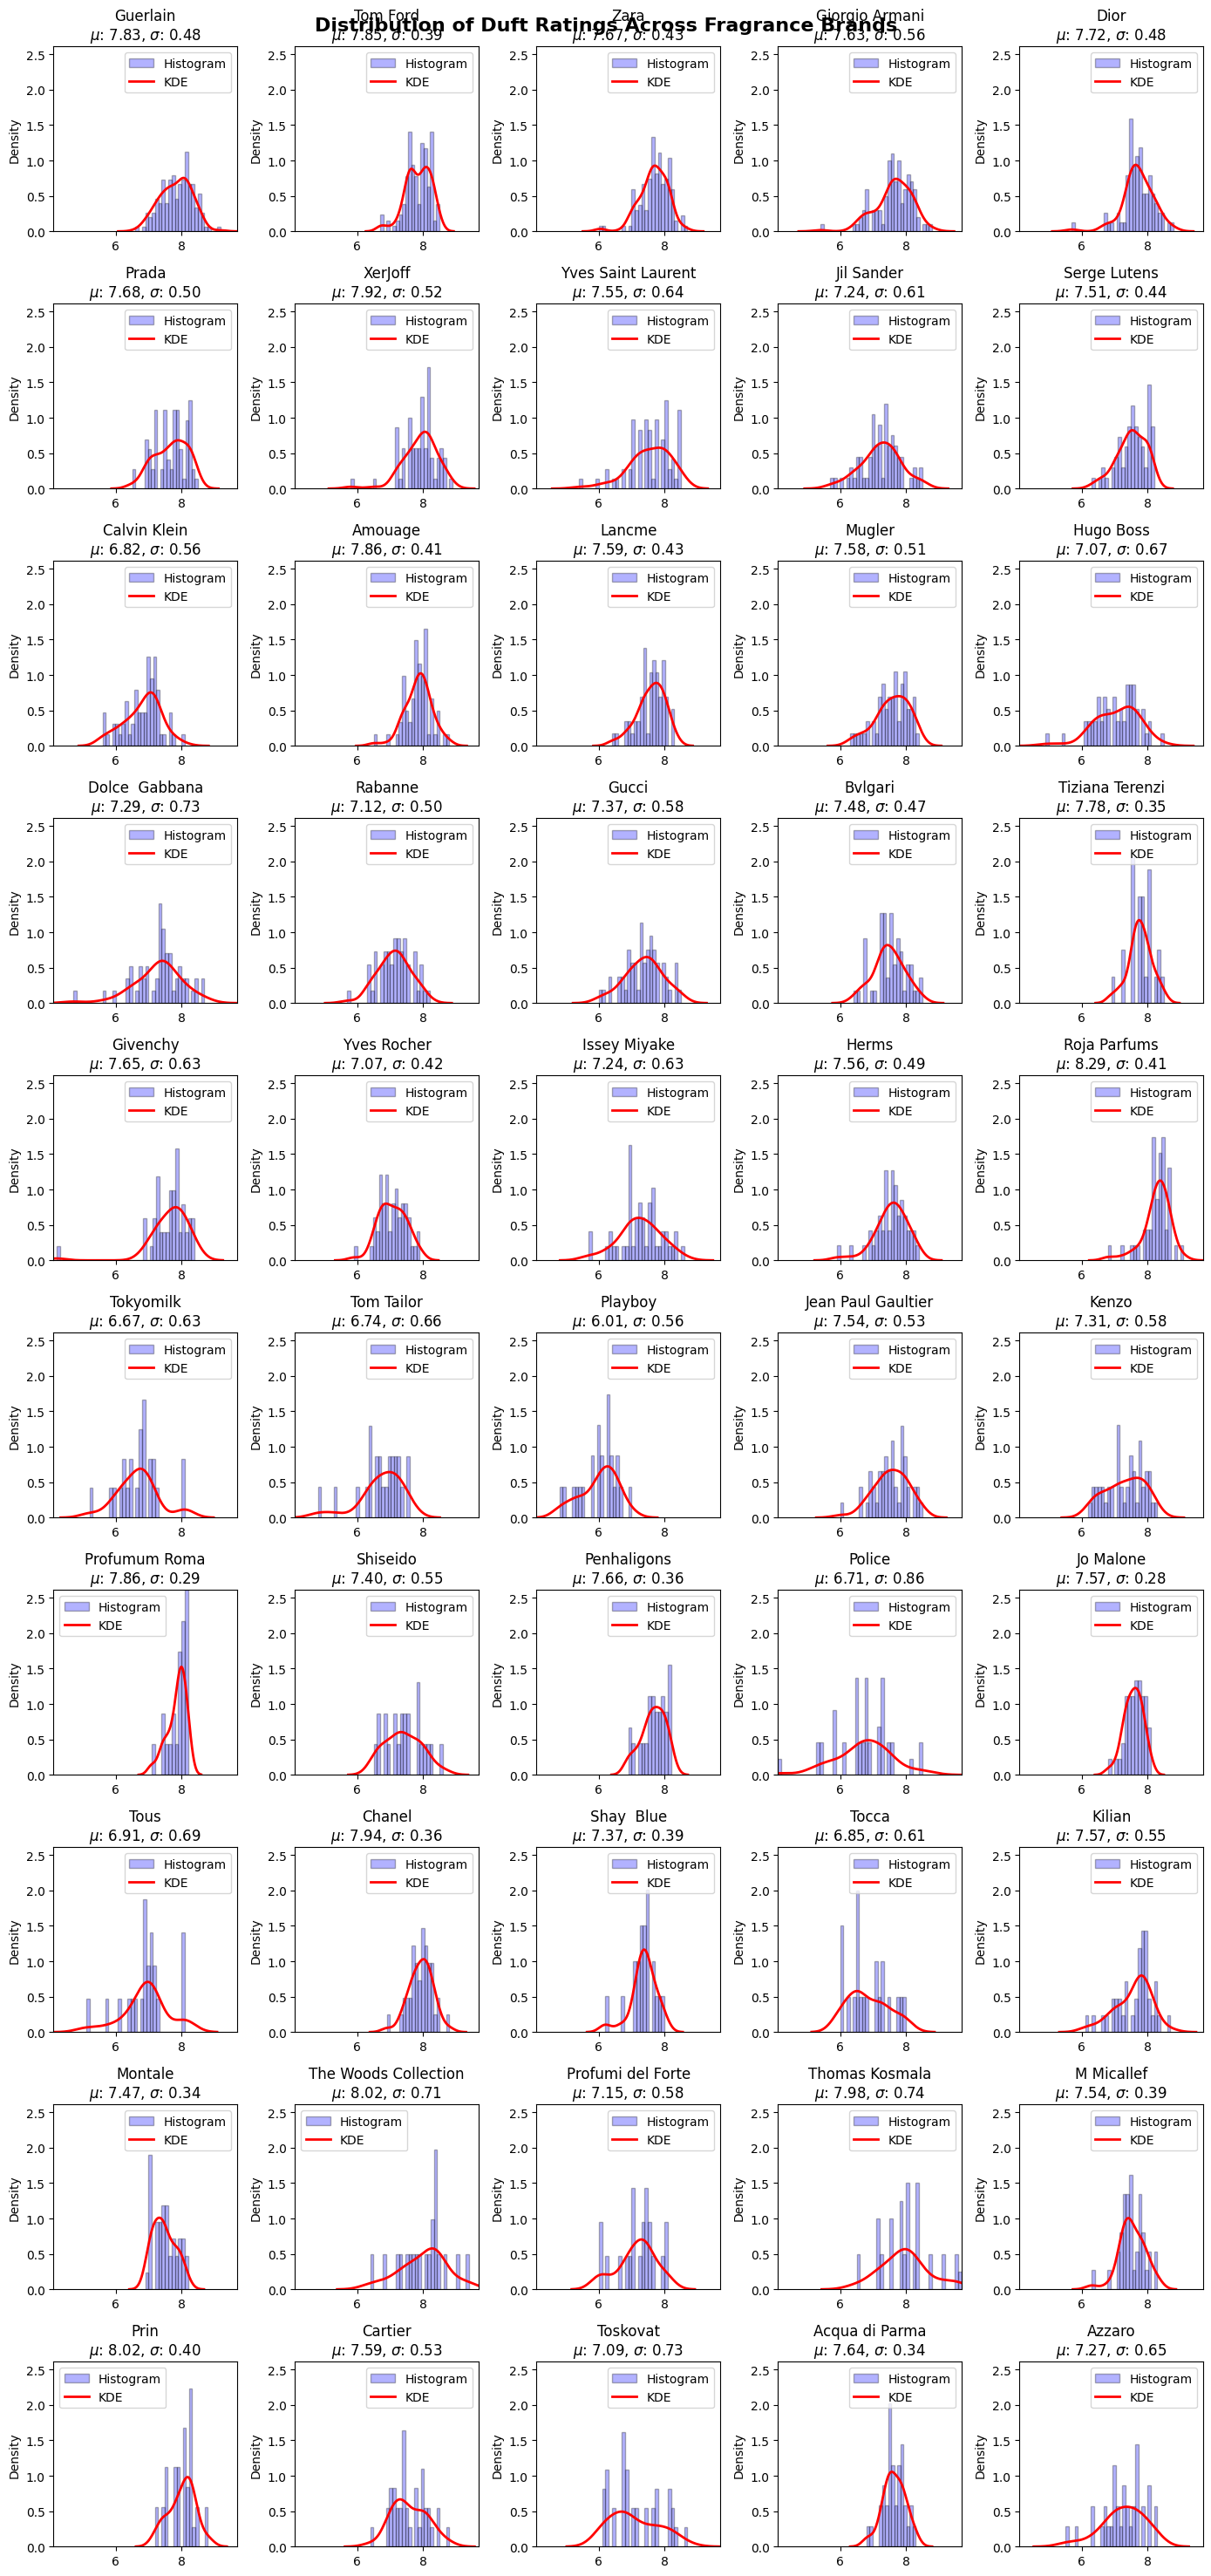

In [81]:
# List of fragrance brands
names = brand[:50]

# Create dictionary mapping brands to their "Duft.rating"
col_data = {name: np.array(df.loc[df['brand'] == name, 'Duft.rating'].dropna()) for name in names}

# Create 2x4 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(14, 30))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of Duft Ratings Across Fragrance Brands", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all brands' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

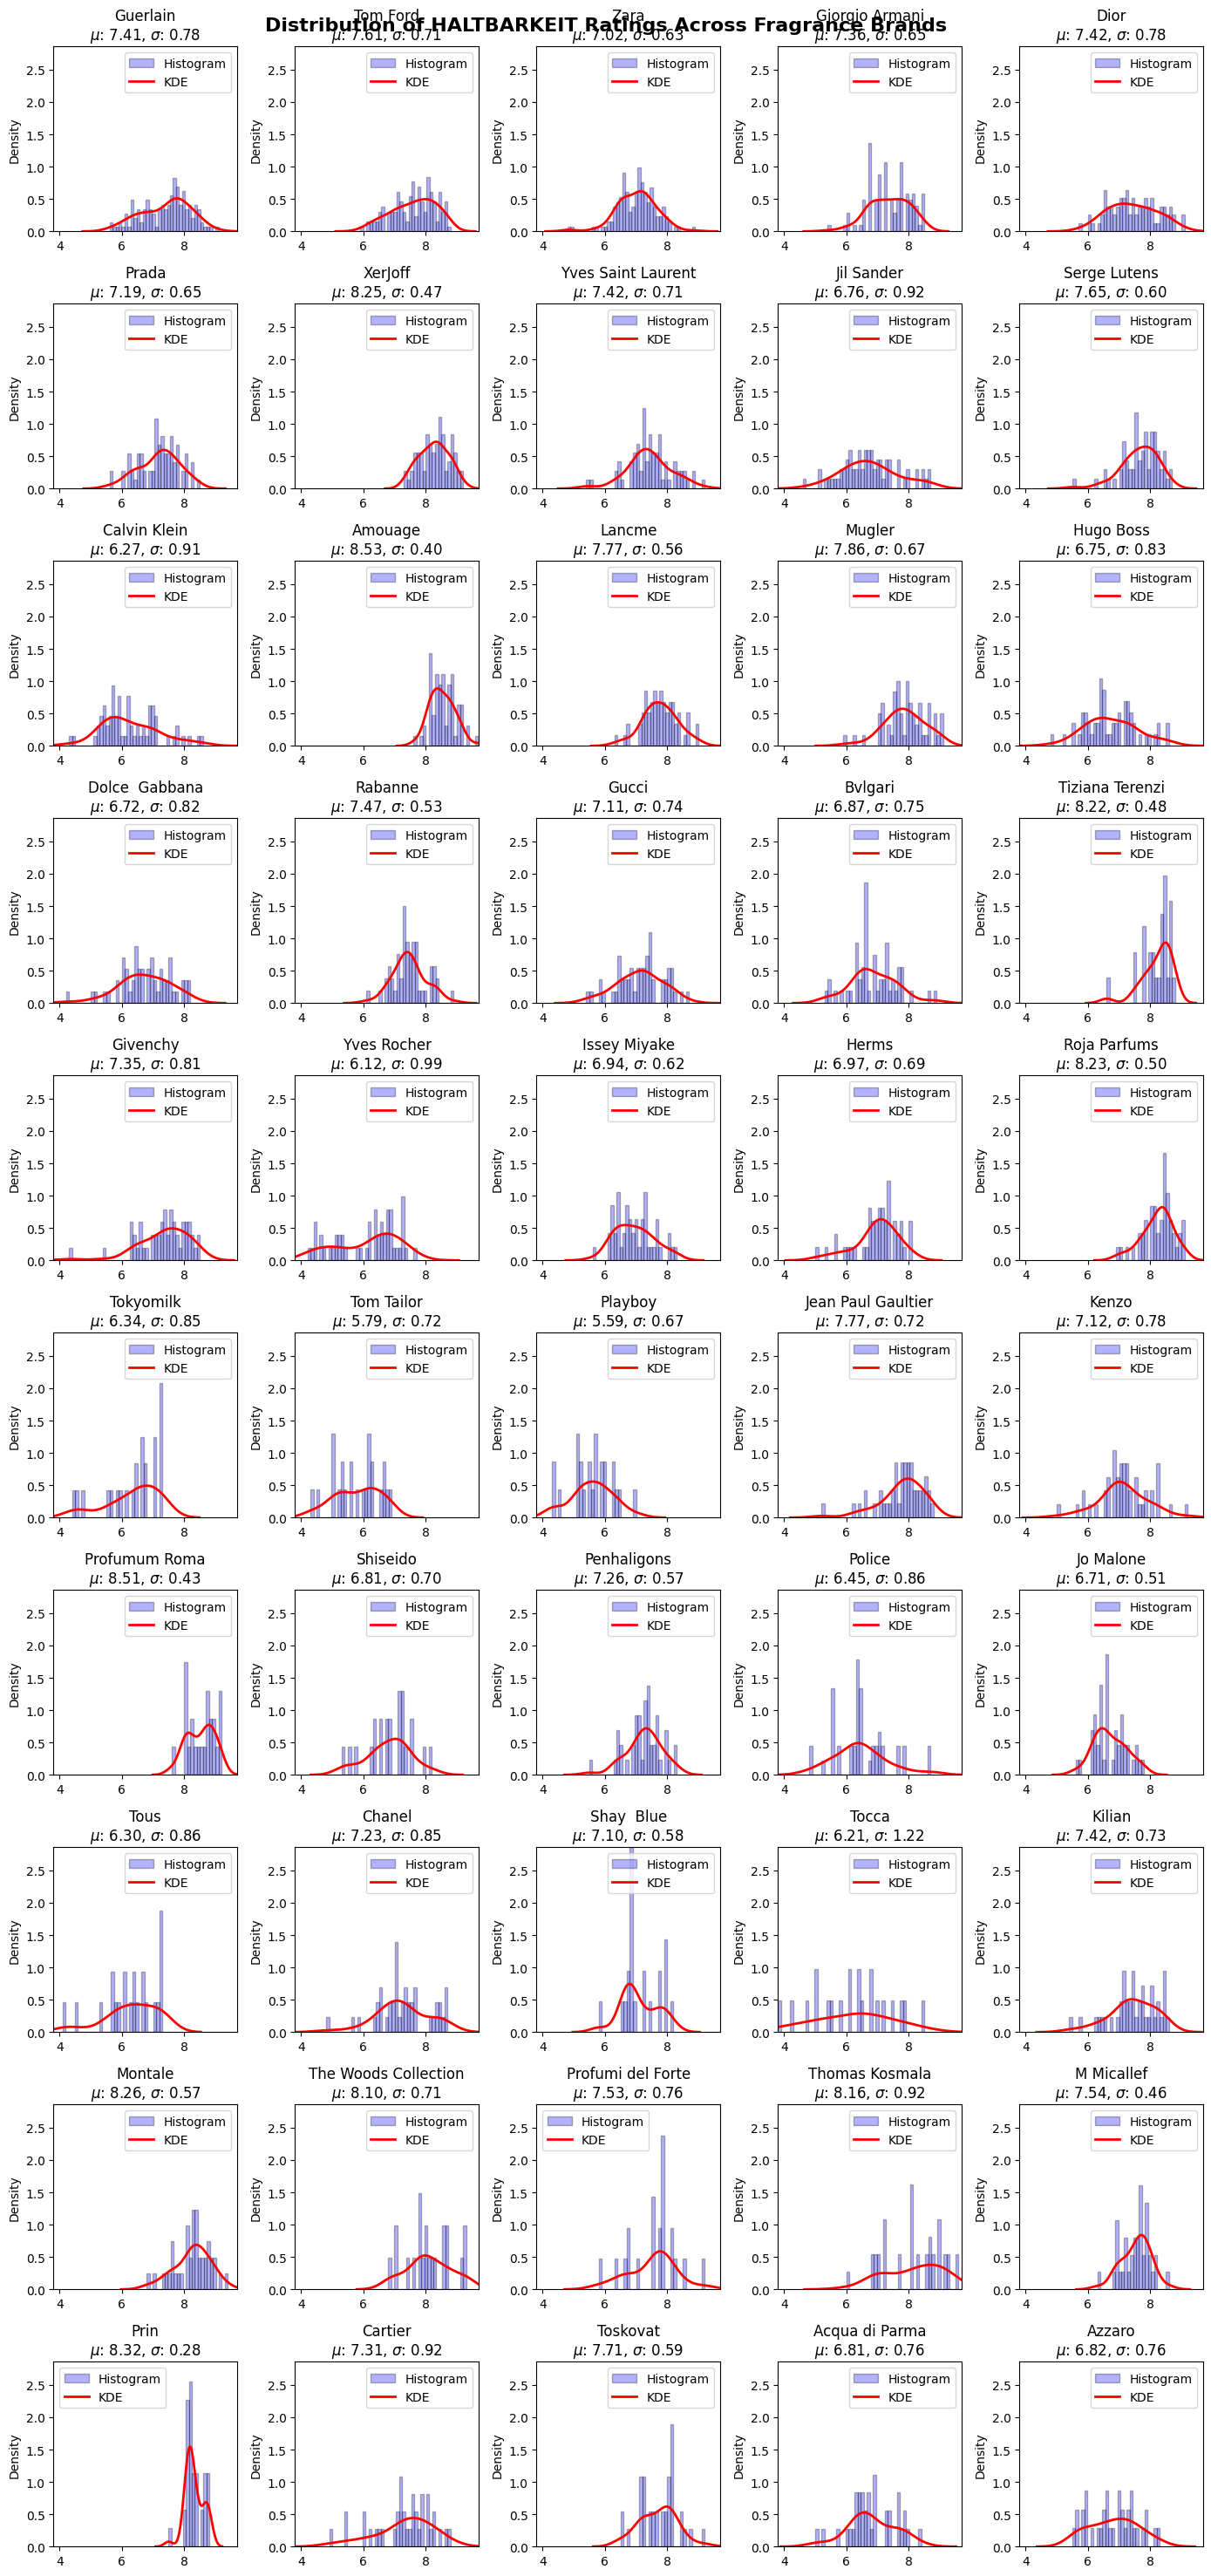

In [82]:
# List of fragrance brands
names = brand[:50]

# Create dictionary mapping brands to their "Duft.rating"
col_data = {name: np.array(df.loc[df['brand'] == name, 'Haltbarkeit.rating'].dropna()) for name in names}

# Create 2x4 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(14, 30))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of HALTBARKEIT Ratings Across Fragrance Brands", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all brands' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

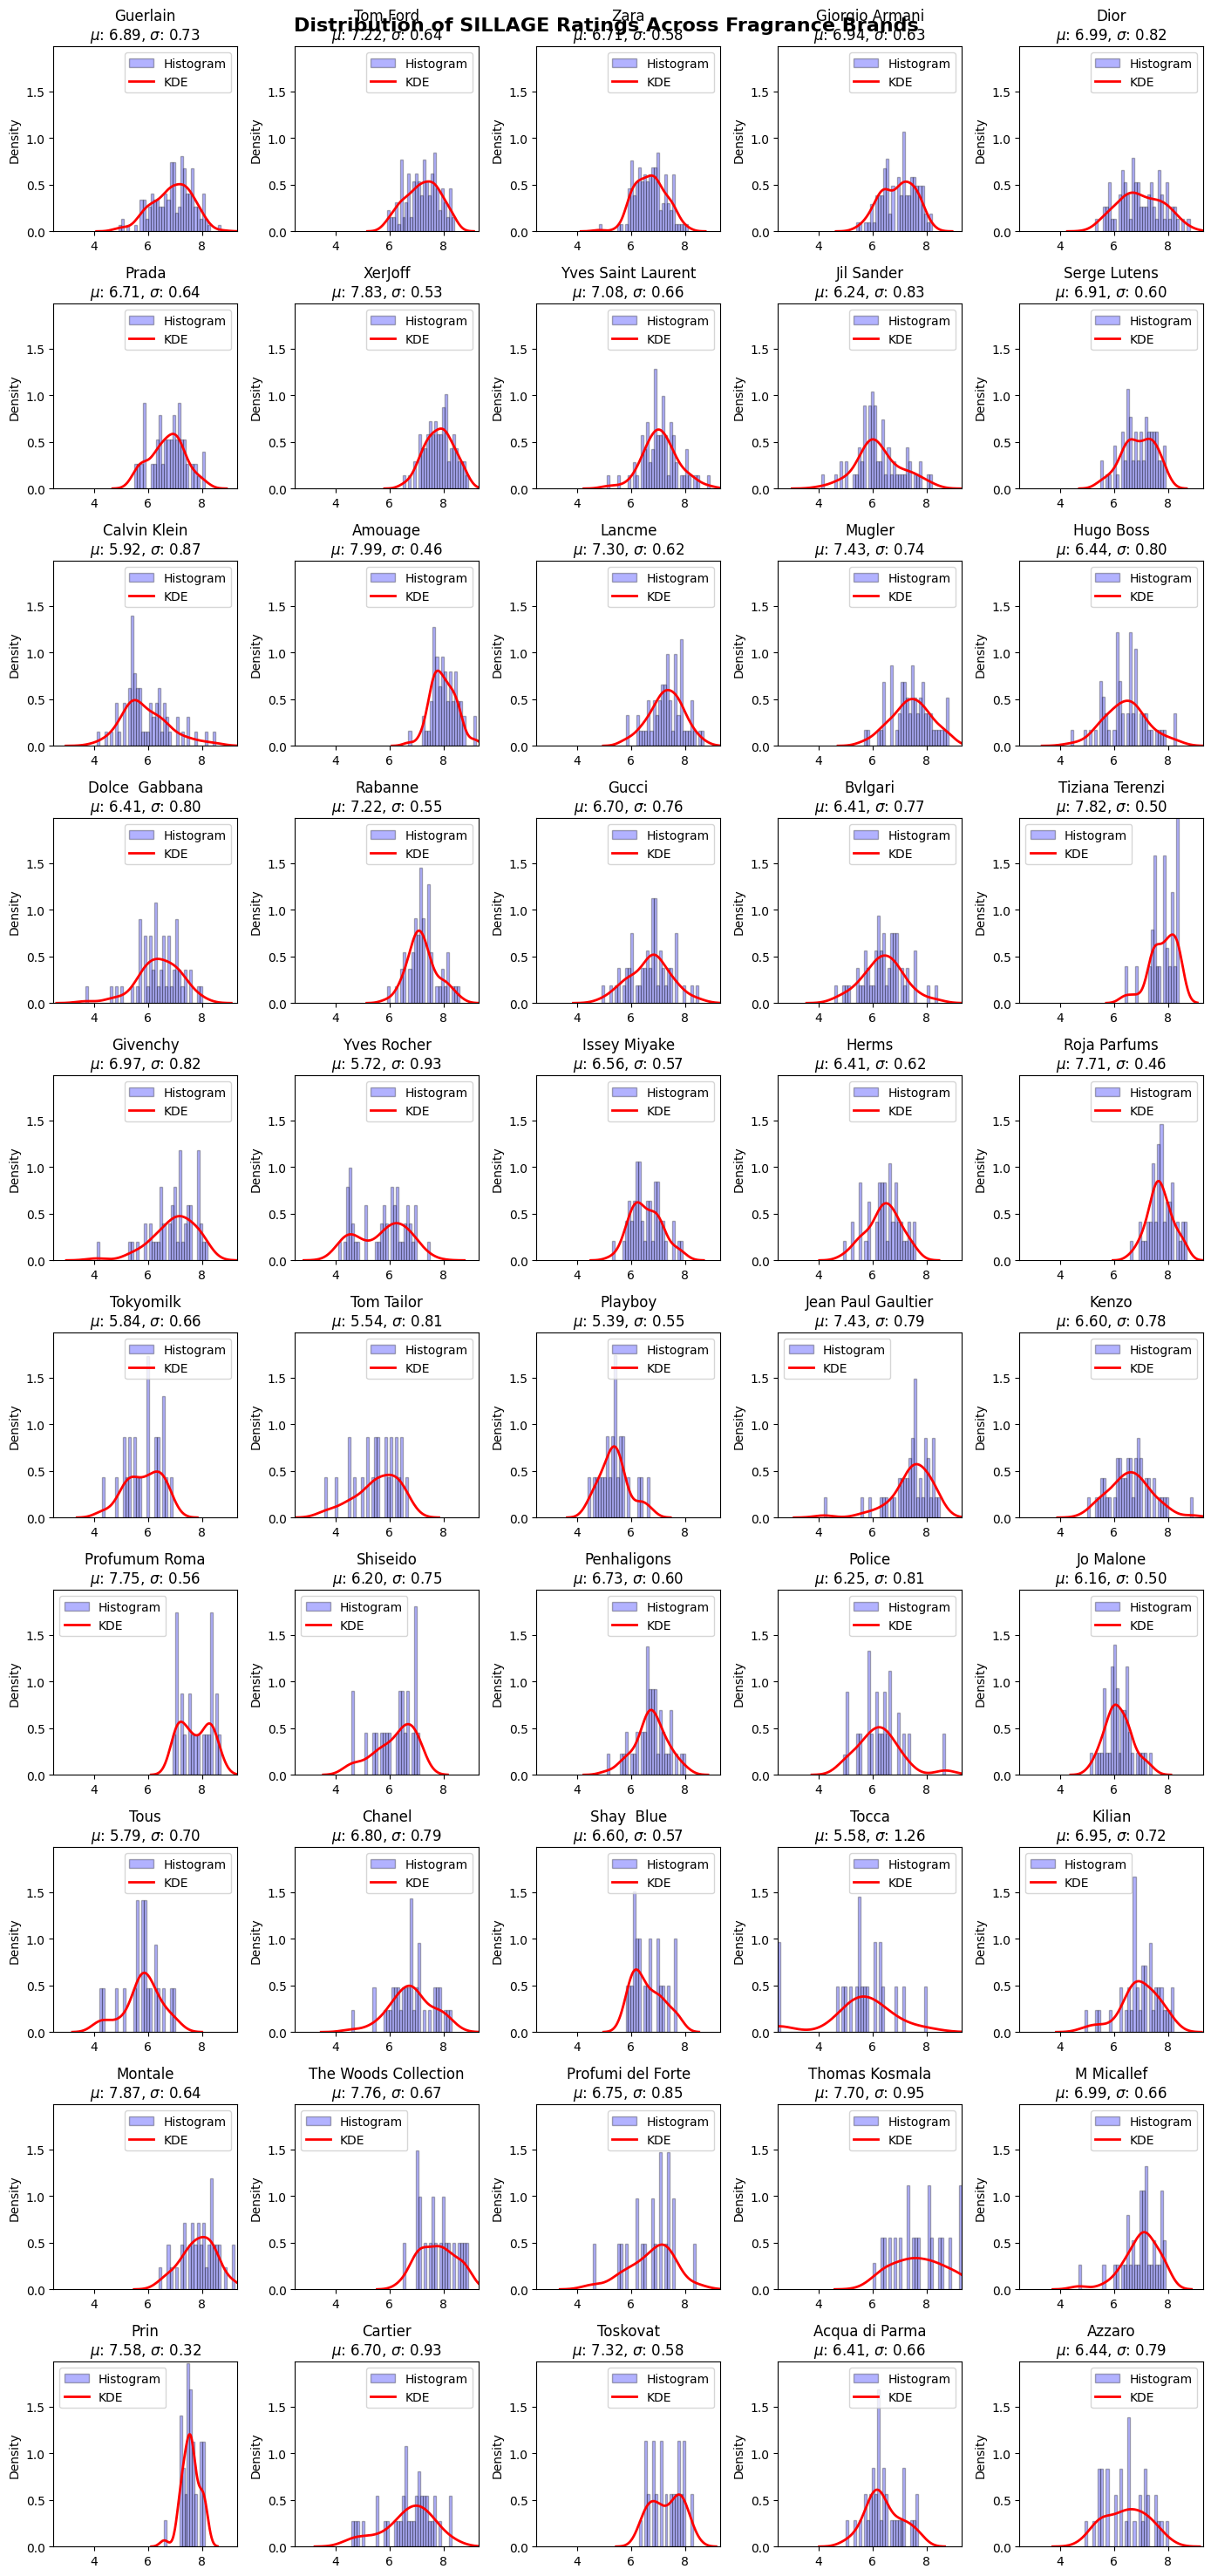

In [83]:
# List of fragrance brands
names = brand[:50]

# Create dictionary mapping brands to their "Duft.rating"
col_data = {name: np.array(df.loc[df['brand'] == name, 'Sillage.rating'].dropna()) for name in names}

# Create 2x4 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(14, 30))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of SILLAGE Ratings Across Fragrance Brands", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all brands' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

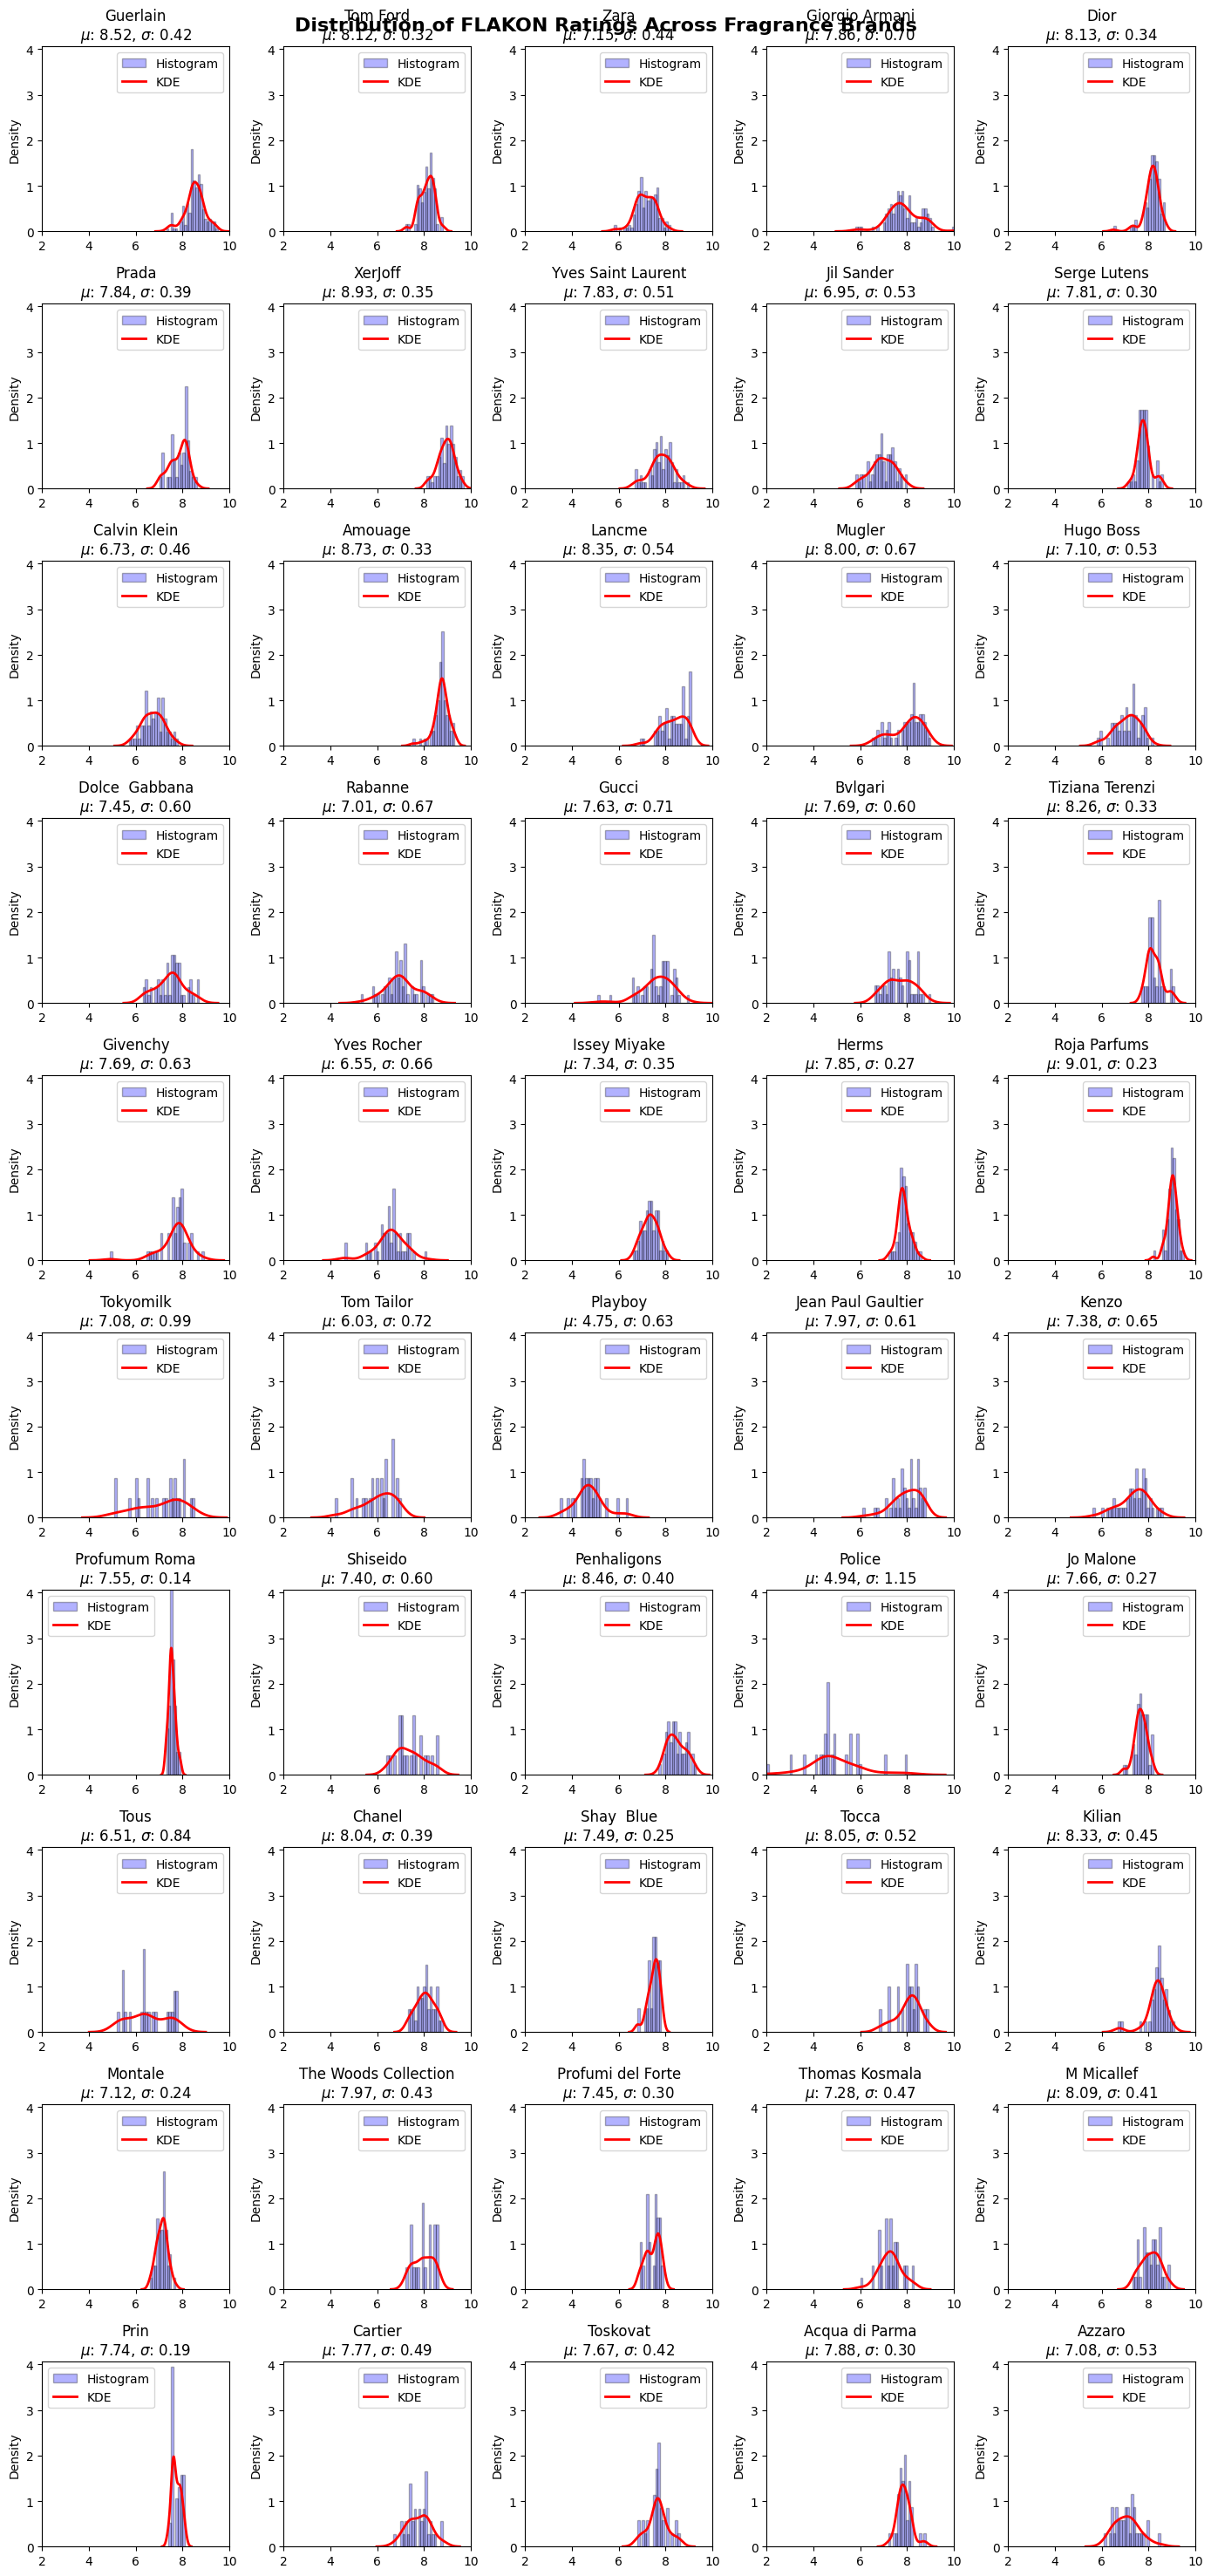

In [84]:
# List of fragrance brands
names = brand[:50]

# Create dictionary mapping brands to their "Duft.rating"
col_data = {name: np.array(df.loc[df['brand'] == name, 'Flakon.rating'].dropna()) for name in names}

# Create 2x4 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(14, 30))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of FLAKON Ratings Across Fragrance Brands", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all brands' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

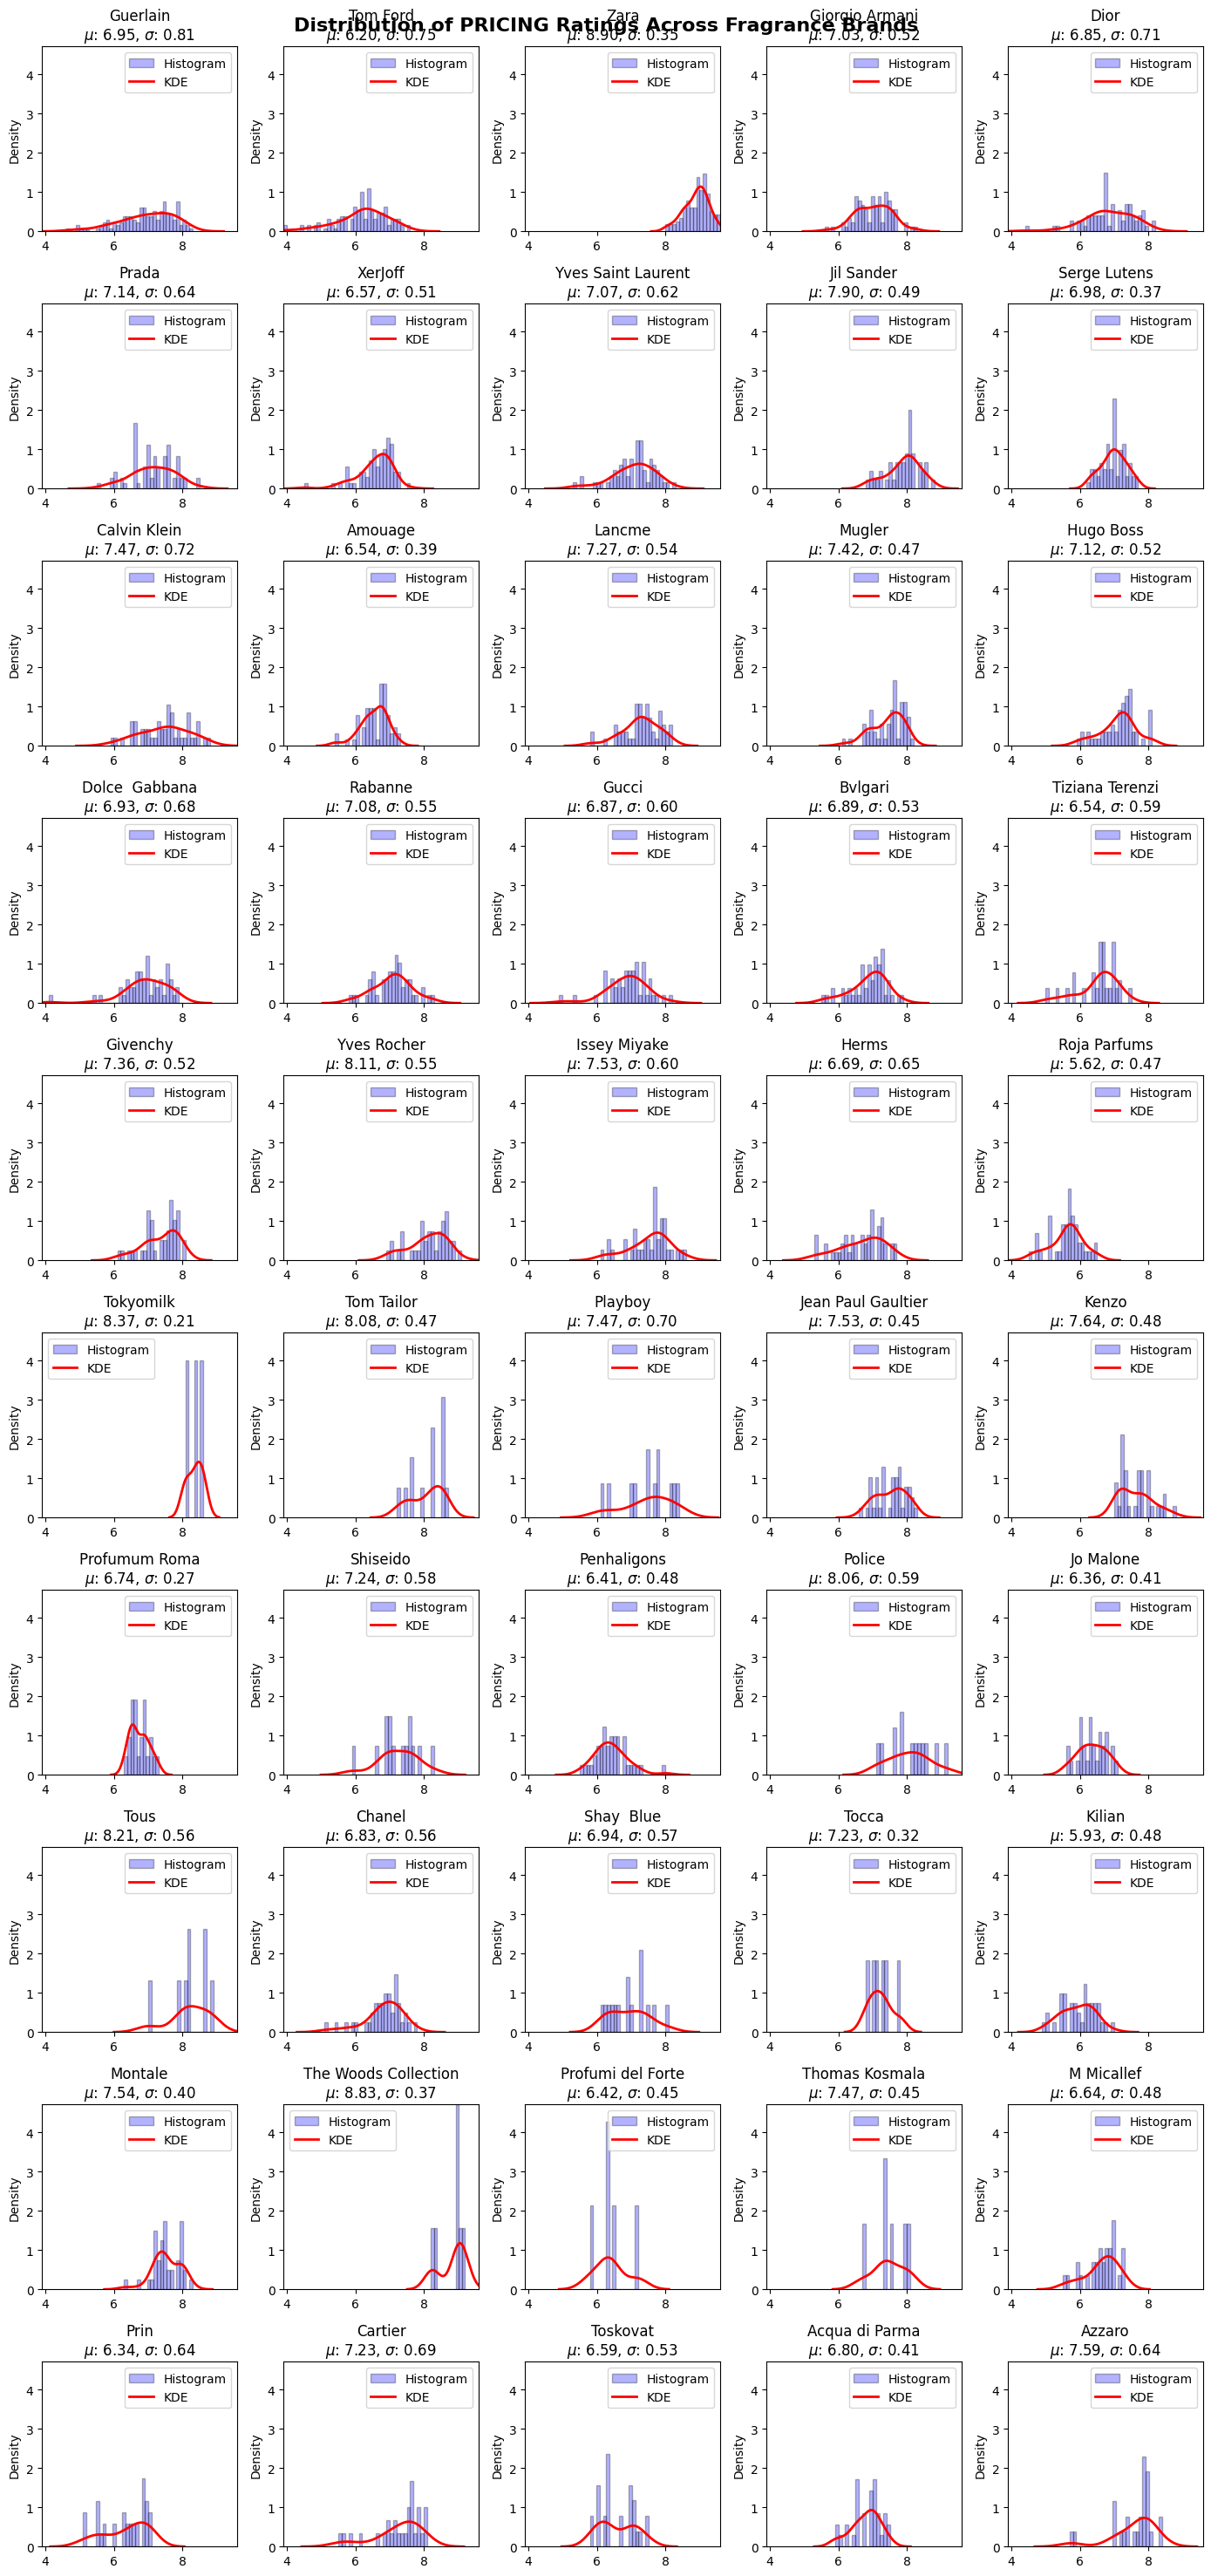

In [85]:
# List of fragrance brands
names = brand[:50]

# Create dictionary mapping brands to their "Duft.rating"
col_data = {name: np.array(df.loc[df['brand'] == name, 'Preis-Leistungs-Verhältnis.rating'].dropna()) for name in names}

# Create 2x4 grid of subplots
fig, axes = plt.subplots(10, 5, figsize=(14, 30))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of PRICING Ratings Across Fragrance Brands", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all brands' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Perfumers

Perfumer Counts: {'Alberto Morillas': 210, 'Jérôme Epinette': 148, 'Francis Kurkdjian': 115, 'Nathalie Lorson': 113, 'Dominique Ropion': 112, 'Michel Almairac': 112, 'Olivier Cresp': 107, 'Thierry Wasser': 99, 'Sonia Constant': 94, 'Quentin Bisch': 93, 'François Demachy': 91, 'Daniela Andrier': 90, 'Paolo Terenzi': 88, 'Prin Lomros': 87, 'Marie Salamagne': 85, 'Jacques Cavallier-Belletrud': 84, 'Anne Flipo': 79, 'Aurélien Guichard': 78, 'Rodrigo Flores-Roux': 75, 'Fabrice Pellegrin': 75, 'Bertrand Duchaufour': 74, 'Christian Carbonnel a.k.a. Chris Maurice': 73, 'Julie Massé': 71, 'Aliénor Massenet': 66, 'Luca Maffei': 64, 'Christine Nagel': 61, 'Carlos Benaïm': 60, 'Frank Voelkl': 60, 'Honorine Blanc': 59, 'Olivier Polge': 59, 'Daphné Bugey': 56, 'Amélie Bourgeois': 56, 'Julien Rasquinet': 55, 'Louise Turner': 55, 'Jordi Fernández': 55, 'Harry Frémont': 55, 'Christophe Raynaud': 54, 'Karine Dubreuil-Sereni': 53, 'Olivier Pescheux': 51, 'Annick Ménardo': 51, 'Sophie Labbé': 50, 'Véroniq

Text(0.5, 1.0, 'Perfume Count by Perfumer')

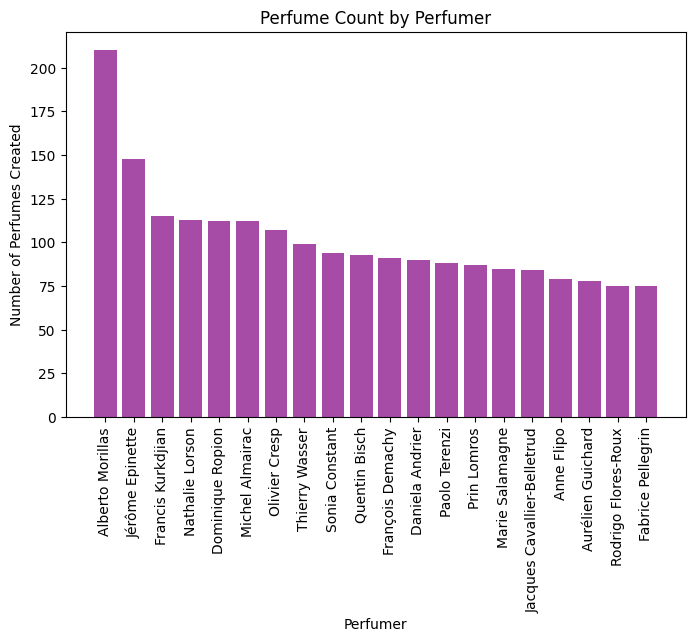

In [86]:
perfumer_counts = df['perfumer'].value_counts().to_dict()
# Get the top 4 perfumers
top_4_perfumers = dict(sorted(perfumer_counts.items(), key=lambda x: x[1], reverse=True)[:4])

print("Perfumer Counts:", perfumer_counts)
print("Top 4 Perfumers:", top_4_perfumers)

perfumers = list(perfumer_counts.keys())
counts = list(perfumer_counts.values())

top = 20
# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(perfumers[:top], counts[:top], color='purple', alpha=0.7)

# Labels and title
plt.xlabel('Perfumer')
plt.ylabel('Number of Perfumes Created')
plt.xticks(rotation=90)

plt.title('Perfume Count by Perfumer')

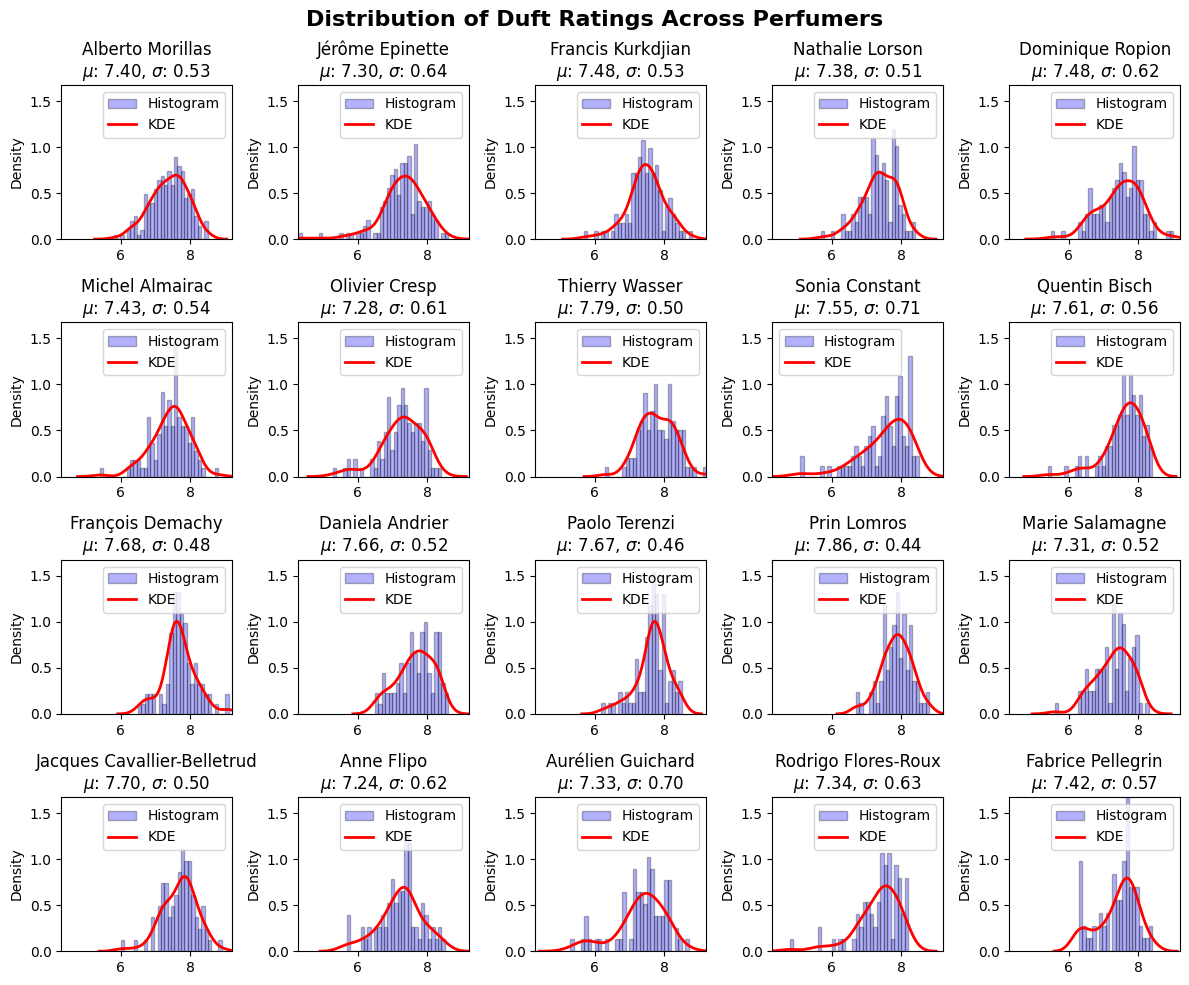

In [87]:
# names = ['Alberto Morillas', 'Thierry Wasser', 'François Demachy', 'Francis Kurkdjian']

names = perfumers[:20]

# Create dictionary mapping perfumers to their "Duft.rating"
col_data = {name: np.array(df.loc[df['perfumer'] == name, 'Duft.rating'].dropna()) for name in names}

# Create 2x2 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
axes = axes.flatten()  # Flatten for easy iteration

fig.suptitle("Distribution of Duft Ratings Across Perfumers", fontsize=16, fontweight='bold')

# Function to calculate the number of bins
def get_bins(array):
    span = array.max() - array.min()
    bins = int(span * 10) + 1
    return bins

# Find global min/max values for x and y limits
all_data = np.concatenate(list(col_data.values()))  # Merge all perfumers' ratings
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=get_bins(data), density=True)
    y_max = max(y_max, counts.max())  # Find max density value

# Plot density histograms in each subplot
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]
    
    # Density histogram
    ax.hist(data, bins=get_bins(data), density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")
    
    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")
    
    ax.set_title(f'{title}\n' + r'$\mu$' + f': {data.mean():.2f}, ' + r'$\sigma$' + f': {data.std():.2f}')
    
    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#### Now take a look at the scent types

In [88]:
output_cols = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", "Animalisch", "Fougère", "Chypre"]
print(len(output_cols))

20


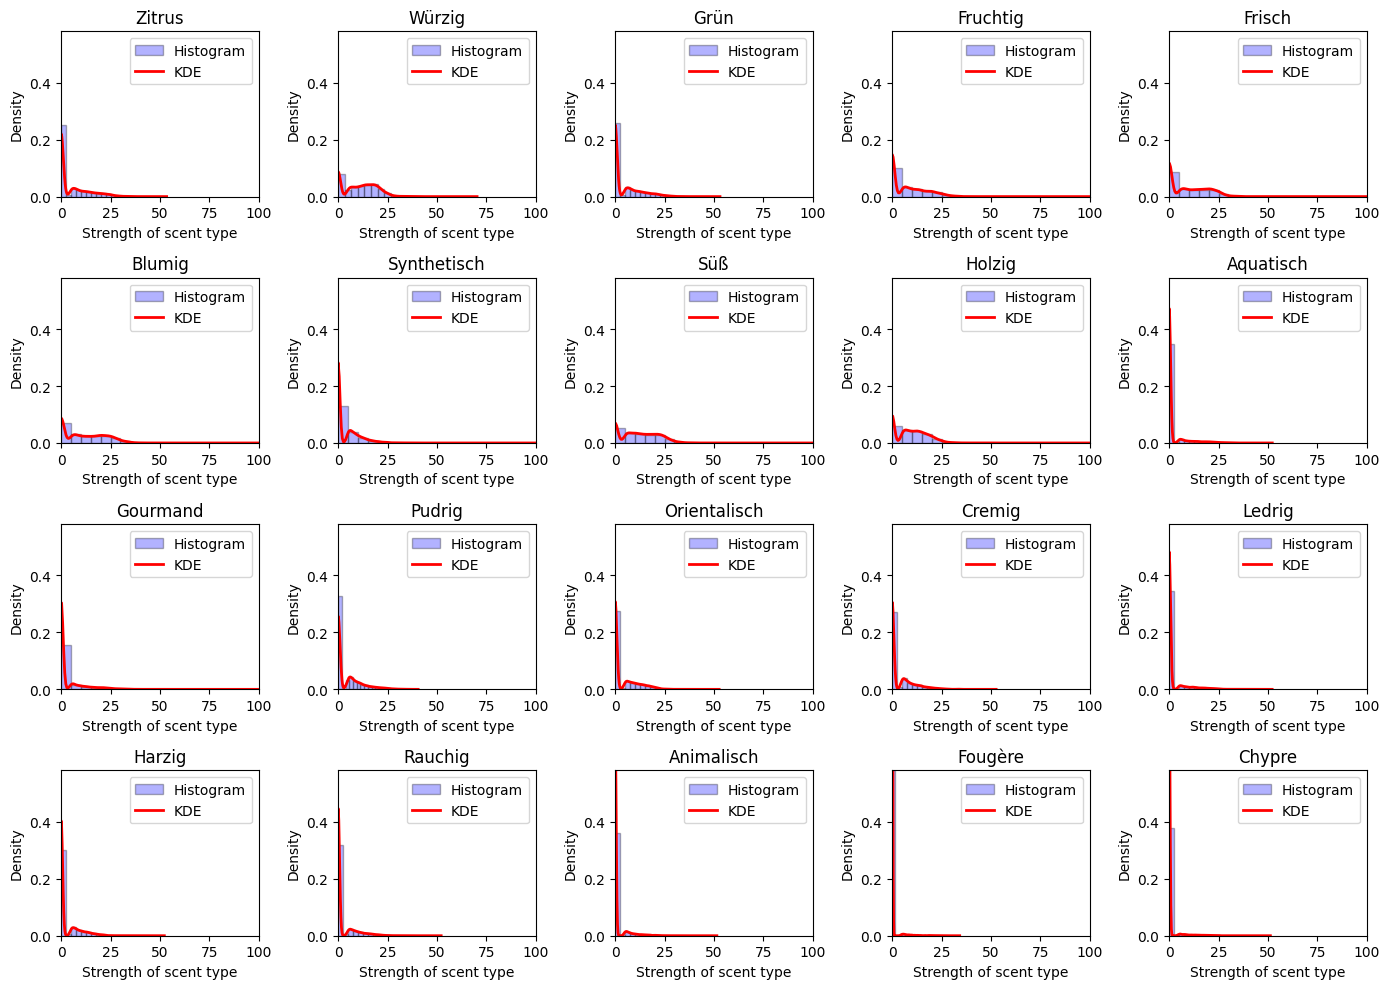

In [89]:
scent_type_names = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", "Animalisch", "Fougère", "Chypre"]

# Create dictionary mapping scent types to their values
col_data = {scent: df[scent].dropna().values for scent in scent_type_names}

# Create 2x2 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Find global x and y axis limits
all_data = np.concatenate(list(col_data.values()))
x_min, x_max = all_data.min(), all_data.max()

y_max = 0
for data in col_data.values():
    counts, bins = np.histogram(data, bins=20, density=True)
    y_max = max(y_max, counts.max())

# Plot density histograms with KDE curves
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]

    # Density histogram
    ax.hist(data, bins=20, density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")

    # KDE (smooth density curve)
    sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")

    ax.set_title(f'{title}')
    ax.set_xlabel('Strength of scent type')
    ax.set_ylabel('Density')

    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

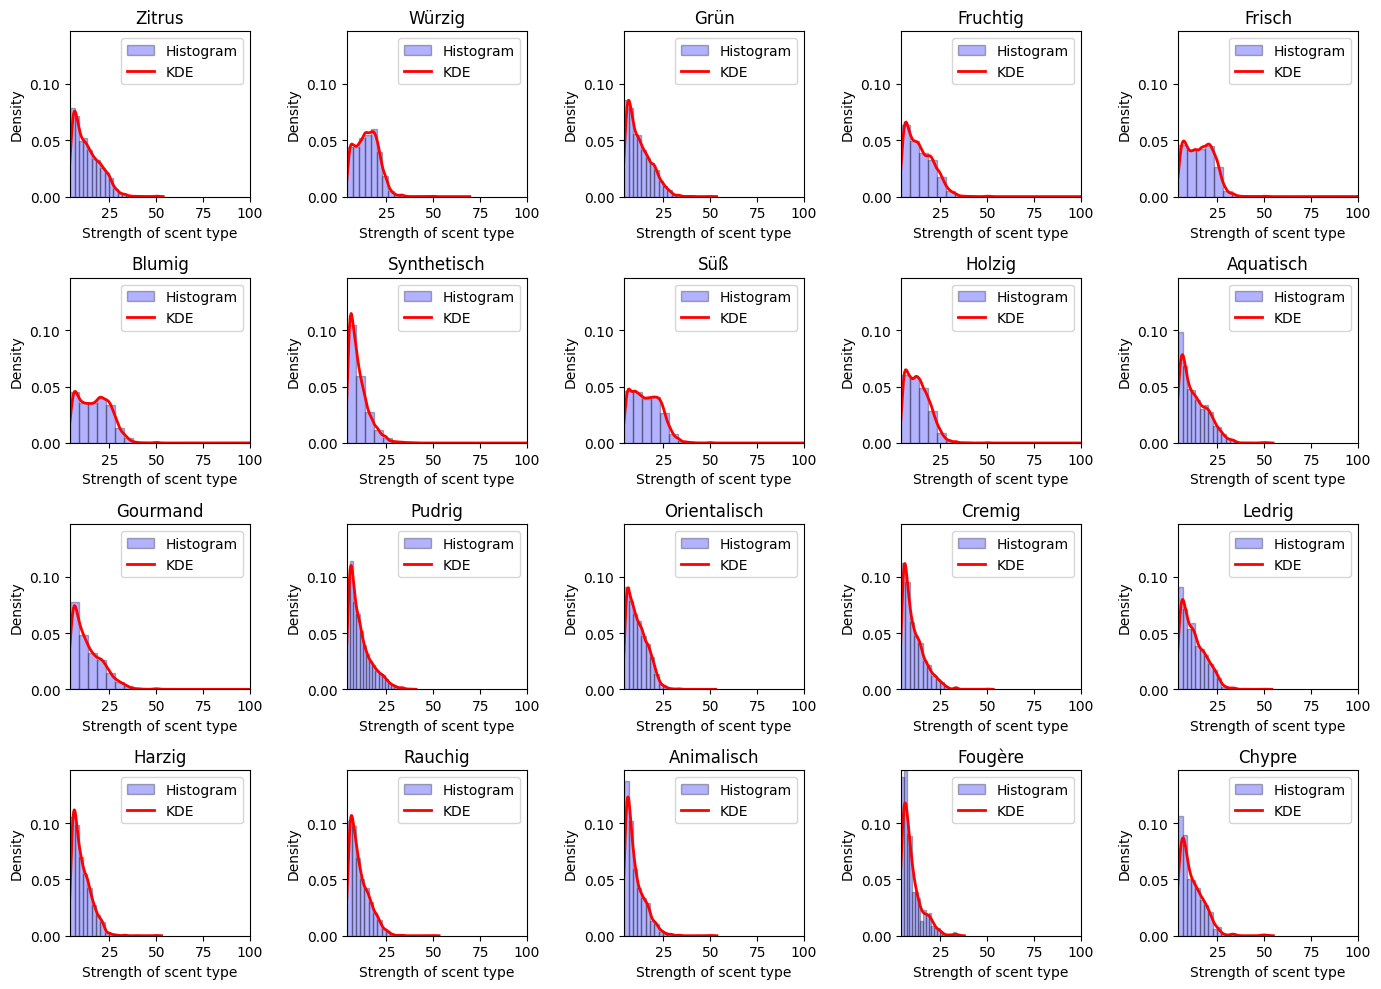

In [90]:

# Assuming df is already defined
scent_type_names = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", 
                    "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", 
                    "Animalisch", "Fougère", "Chypre"]

# Create dictionary mapping scent types to their values (excluding zero and negative values)
col_data = {scent: df[scent].dropna().values[df[scent].dropna().values > 0] for scent in scent_type_names}

# Create 4x5 grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(14, 10))
axes = axes.flatten()  # Flatten for easy iteration

# Find global x and y axis limits (only for positive values)
all_filtered_data = np.concatenate([data for data in col_data.values() if len(data) > 0])
x_min, x_max = all_filtered_data.min(), all_filtered_data.max()

y_max = 0
for data in col_data.values():
    if len(data) > 0:  # Ensure data is not empty
        counts, bins = np.histogram(data, bins=20, density=True)
        y_max = max(y_max, counts.max())

# Plot density histograms with KDE curves
for i, (title, data) in enumerate(col_data.items()):
    ax = axes[i]

    if len(data) > 0:  # Avoid empty plots
        # Compute histogram
        counts, bin_edges = np.histogram(data, bins=20, density=True)

        # Plot histogram
        ax.hist(data, bins=20, density=True, alpha=0.3, color="blue", edgecolor="black", label="Histogram")

        # KDE (smooth density curve)
        sns.kdeplot(data, ax=ax, color="red", linewidth=2, label="KDE")

    ax.set_title(f'{title}')
    ax.set_xlabel('Strength of scent type')
    ax.set_ylabel('Density')

    # Set global axis limits
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, y_max)

    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

### Now we can think about how to choose the right features and what to analyize

In [91]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

df['all_notes'] = df['all_notes'].apply(lambda x: x if isinstance(x, list) else [])

# Apply MultiLabelBinarizer to each column and create new DataFrames
notes_encoded = pd.DataFrame(mlb.fit_transform(df['all_notes']), columns=mlb.classes_, index=df.index)

# Merge with the original DataFrame
df_encoded = pd.concat([df, notes_encoded], axis=1)

In [92]:
df_encoded.to_pickle("encoded_perfumes.pkl")

In [93]:
df_encoded[(df_encoded['Bergamotte']==1) & (df_encoded['Rose']==1)].head()

name             brand    year collection flakon_designer               perfumer                                                             top_notes                                                    middle_notes  \
51                                Amour   Pierre de Velay  2021.0       None            None              Roja Dove                                          [Bergamotte, Kaffernlimette]  [Heliotrop, Ylang-Ylang, Rose, Veilchen, Jasmin, Orangenblüte]   
126                           Woman III        Jil Sander  2012.0       None            None                   None                                 [Bergamotte, Bitterorange, Koriander]                                             [Gartennelke, Rose]   
128       Aqua Allegoria Granada Salvia          Guerlain  2020.0       None            None         Thierry Wasser  [Granatapfel, Zitrone, Bergamotte, Schwarze Johannisbeere, Zypresse]                                                  [Salbei, Rose]   
136  Guilty Elixir de Parfum pour Femme             Gucci  2023.0       None            None  Nathalie Gracia-Cetto                                       [Veilchen, Mandora, Bergamotte]                                    [Blauregen, Rose, Osmanthus]   
202                              Poésie  Frdric Haldimann  2013.0       None            None     Frédéric Haldimann                       [Bergamotte, Orangenblüte, Osmanthus, Pfirsich]                             [Geißblatt, Jasmin, Rose, Tuberose]   

                                                                                                                                           base_notes  \
51   [Zistrose, Benzoe, Ingwer, Labdanum, Moos, Moschus, Papyrus, Safran, Tolubalsam, Vanille, Cypriol, Patchouli, Sandelholz, Weihrauch, Zedernholz]   
126                                                                                                                                       [Patchouli]   
128                                                                                                                 [weißer Moschus, Moos, Patchouli]   
136                                                                                                          [Patchouli, Tonkabohne, Vanille Absolue]   
202                                                                                            [Amber, Iris, Moschus, Patchouli, Sandelholz, Vanille]   

                                                                                                                                                                                                                                      all_notes                                                                      url  Duft.rating  \
51   [Bergamotte, Kaffernlimette, Heliotrop, Ylang-Ylang, Rose, Veilchen, Jasmin, Orangenblüte, Zistrose, Benzoe, Ingwer, Labdanum, Moos, Moschus, Papyrus, Safran, Tolubalsam, Vanille, Cypriol, Patchouli, Sandelholz, Weihrauch, Zedernholz]                     https://www.parfumo.de/Parfums/Pierre_de_Velay/amour          8.3   
126                                                                                                                                                                         [Bergamotte, Bitterorange, Koriander, Gartennelke, Rose, Patchouli]                 https://www.parfumo.de/Parfums/Jil_Sander/Woman_III_2012          7.2   
128                                                                                                                         [Granatapfel, Zitrone, Bergamotte, Schwarze Johannisbeere, Zypresse, Salbei, Rose, weißer Moschus, Moos, Patchouli]    https://www.parfumo.de/Parfums/Guerlain/aqua-allegoria-granada-salvia          7.9   
136                                                                                                                                         [Veilchen, Mandora, Bergamotte, Blauregen, Rose, Osmanthus, Patchouli, Tonkabohne, Vanille Absolue]  https://www.parfumo.de/Parfums/Gucci/gui

In [94]:
# let's get some correlations between the ingredients and the scent type

correlation = df_encoded['Bergamotte'].corr(df_encoded['Zitrus'])
print(correlation)

0.1330194936744858


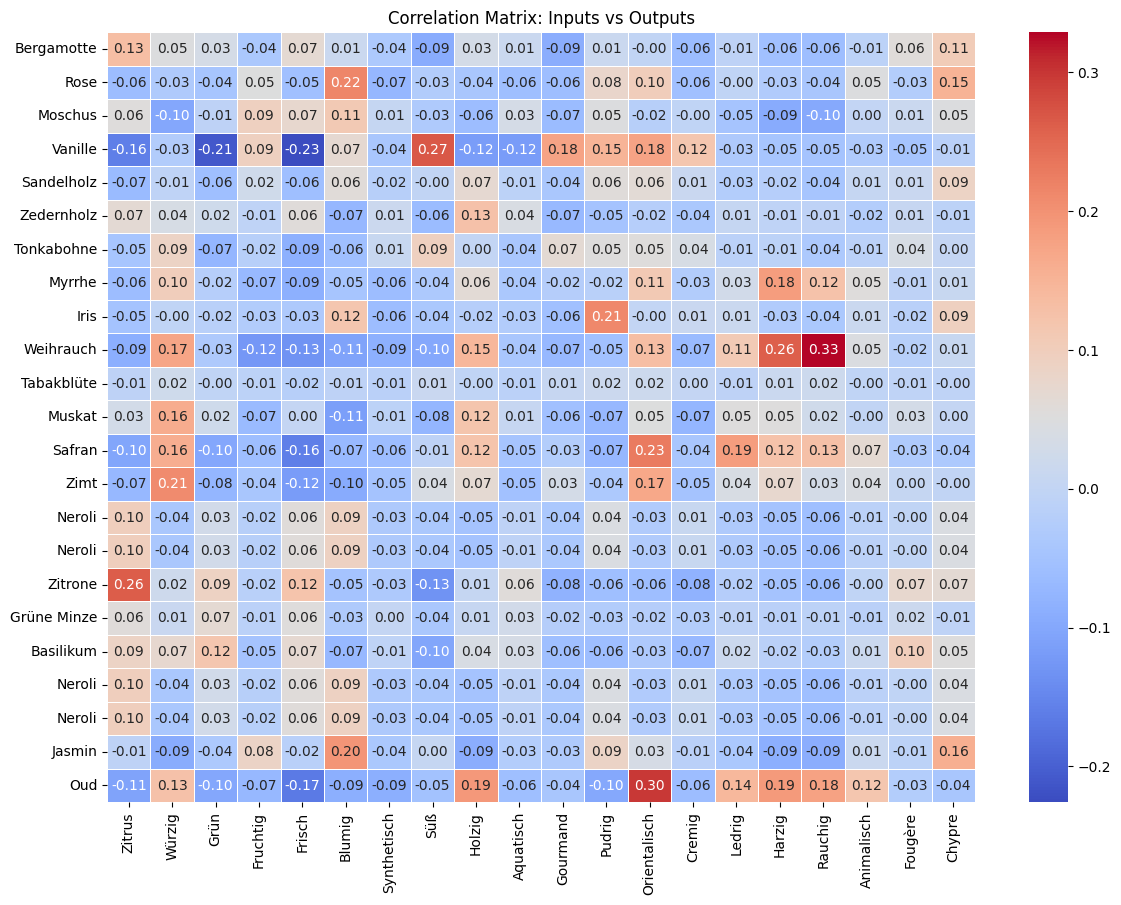

In [95]:
input_cols = ["Bergamotte", "Rose", "Moschus", "Vanille", "Sandelholz", "Zedernholz", "Tonkabohne", "Myrrhe", "Iris", "Weihrauch", "Tabakblüte", "Muskat", "Safran", "Zimt", "Neroli", "Zitrone", "Grüne Minze", "Basilikum", "Neroli", "Jasmin", "Oud"]
output_cols = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", "Animalisch", "Fougère", "Chypre"]

# Compute correlations between inputs & outputs
correlation_matrix = df_encoded[input_cols + output_cols].corr()

# Extract correlations between inputs and outputs
correlation_matrix = correlation_matrix.loc[input_cols, output_cols]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: Inputs vs Outputs")
plt.show()

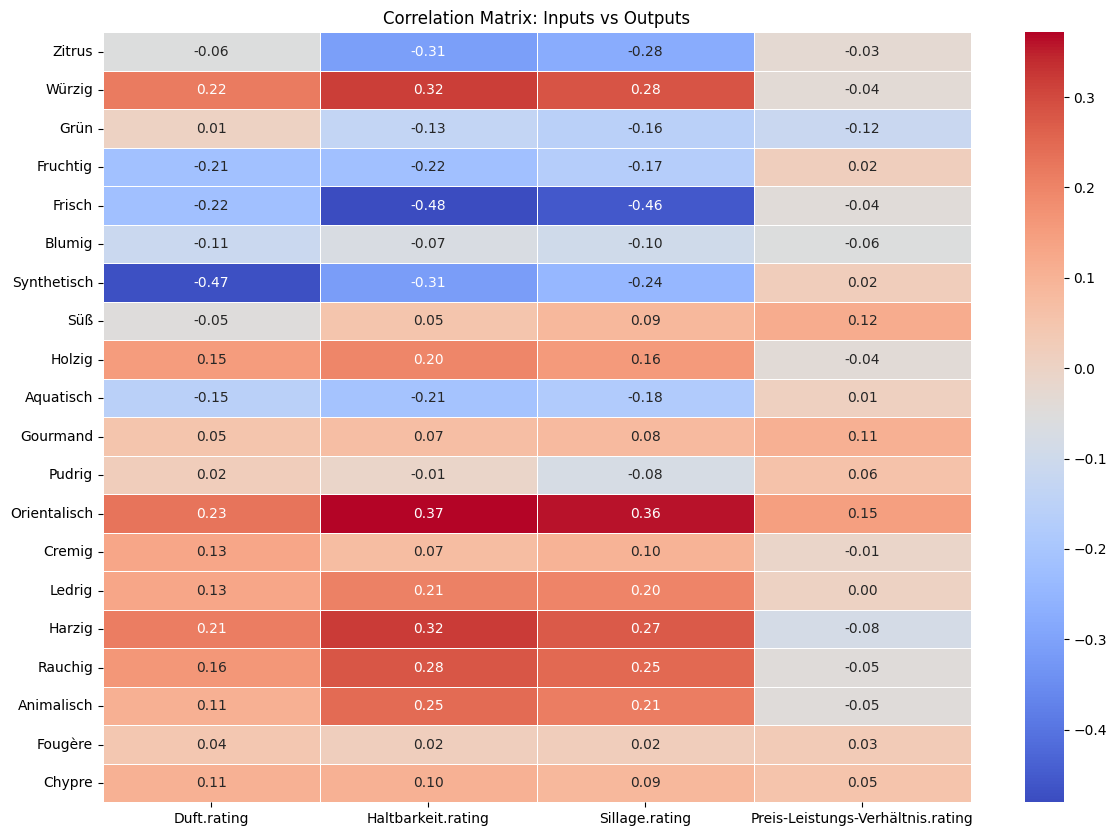

In [98]:
input_cols = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", "Animalisch", "Fougère", "Chypre"]
output_cols = ["Duft.rating", "Haltbarkeit.rating", "Sillage.rating", "Preis-Leistungs-Verhältnis.rating"]

# Compute correlations between inputs & outputs
correlation_matrix = df_encoded[input_cols + output_cols].corr()

# Extract correlations between inputs and outputs
correlation_matrix = correlation_matrix.loc[input_cols, output_cols]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: Inputs vs Outputs")
plt.show()

In [ ]:
output_cols = ["Zitrus", "Würzig", "Grün", "Fruchtig", "Frisch", "Blumig", "Synthetisch", "Süß", "Holzig", "Aquatisch", "Gourmand", "Pudrig", "Orientalisch", "Cremig", "Ledrig", "Harzig", "Rauchig", "Animalisch", "Fougère", "Chypre"]


In [ ]:
best_inputs = {}
for output in output_cols:
    correlation_matrix = notes_encoded.corrwith(df[output])
    best_input = correlation_matrix.abs().idxmax()
    best_inputs[output] = (best_input, correlation_matrix[best_input])

# Print results
for output, (best_input, corr) in best_inputs.items():
    print(f"Best input for {output}: {best_input} (Correlation: {corr:.2f})")

Best input for Zitrus: Zitrone (Correlation: 0.26)
Best input for Würzig: Zimt (Correlation: 0.21)
Best input for Grün: Vanille (Correlation: -0.21)
Best input for Fruchtig: Himbeere (Correlation: 0.22)
Best input for Frisch: Vanille (Correlation: -0.23)
Best input for Blumig: Rose (Correlation: 0.22)
Best input for Synthetisch: maritime Noten (Correlation: 0.10)
Best input for Süß: Vanille (Correlation: 0.27)
Best input for Holzig: Oud (Correlation: 0.19)
Best input for Aquatisch: maritime Noten (Correlation: 0.31)
Best input for Gourmand: Karamell (Correlation: 0.24)
Best input for Pudrig: Iris (Correlation: 0.21)
Best input for Orientalisch: Oud (Correlation: 0.30)
Best input for Cremig: Milch (Correlation: 0.14)
Best input for Ledrig: Leder (Correlation: 0.51)
Best input for Harzig: Weihrauch (Correlation: 0.26)
Best input for Rauchig: Weihrauch (Correlation: 0.33)
Best input for Animalisch: Zibet (Correlation: 0.29)
Best input for Fougère: Lavendel (Correlation: 0.21)
Best input f

In [ ]:
print(notes_encoded.columns)

Index(['2-Methylundecanal', 'Abelmoschus', 'Abend-Levkoje', 'Abrialis-Lavendel', 'Absinth', 'Acajouholz', 'Acerolakirsche', 'Ackerwinde', 'Adesmia boronioides', 'Adlerholzharz',
       ...
       'ägyptisches Neroli', 'ägyptisches Rosengeranienblatt', 'ägyptisches Veilchen', 'ägyptisches Veilchenblatt', 'ägyptisches Veilchenblatt Absolue', 'äthiopische Myrrhe', 'äthiopischer Kaffee', 'äthiopischer Kaffee Absolue',
       'äthiopischer Weihrauch', 'äthiopischer Zibet'],
      dtype='object', length=3326)


In [ ]:
output_cols = ["Duft.rating", "Haltbarkeit.rating", "Sillage.rating"]
best_inputs = {}
for output in output_cols:
    correlation_matrix = notes_encoded.corrwith(df[output])
    best_input = correlation_matrix.abs().idxmax()
    best_inputs[output] = (best_input, correlation_matrix[best_input])

# Print results
for output, (best_input, corr) in best_inputs.items():
    print(f"Best input for {output}: {best_input} (Correlation: {corr:.2f})")

/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/hamzaimamovic/Library/Python/3.12/lib/python/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value e

Best input for Duft.rating: Oud (Correlation: 0.11)
Best input for Haltbarkeit.rating: Oud (Correlation: 0.20)
Best input for Sillage.rating: Oud (Correlation: 0.21)


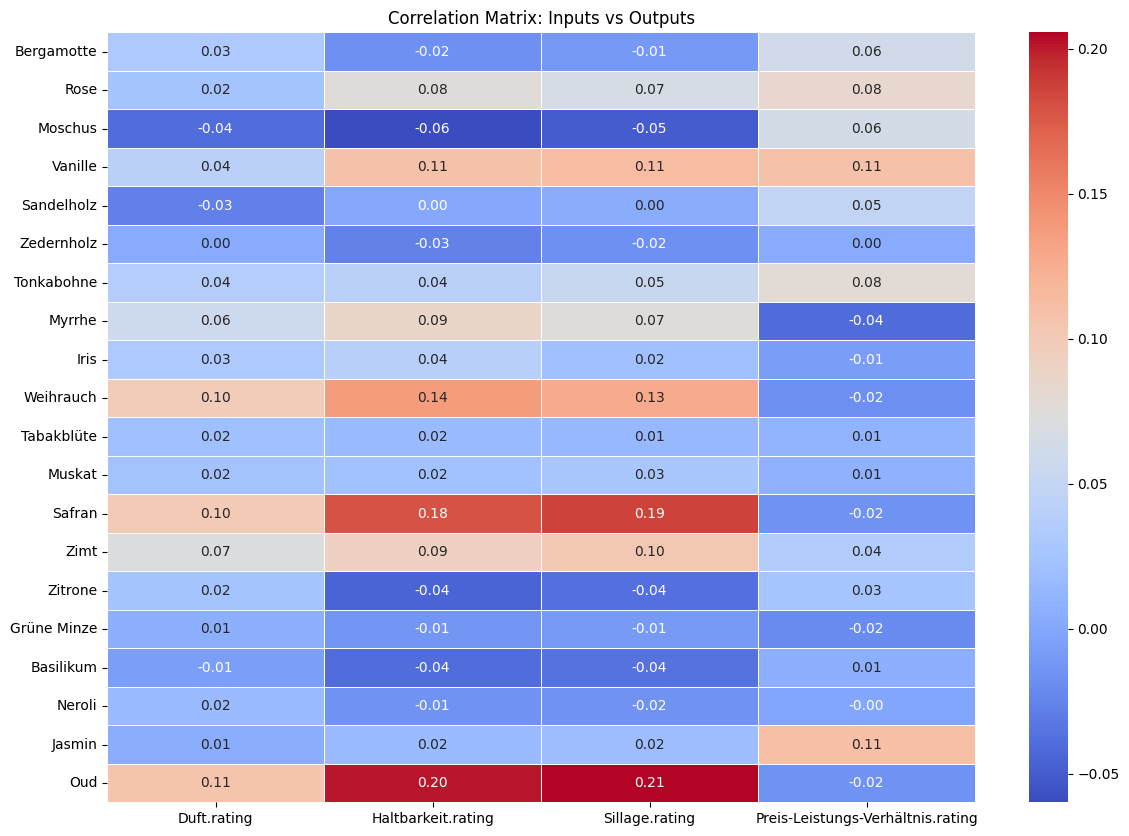

In [ ]:
input_cols = ["Bergamotte", "Rose", "Moschus", "Vanille", "Sandelholz", "Zedernholz", "Tonkabohne", "Myrrhe", "Iris", "Weihrauch", "Tabakblüte", "Muskat", "Safran", "Zimt", "Zitrone", "Grüne Minze", "Basilikum", "Neroli", "Jasmin", "Oud"]
output_cols = ["Duft.rating", "Haltbarkeit.rating", "Sillage.rating", "Preis-Leistungs-Verhältnis.rating"]
# Compute correlations between inputs & outputs
correlation_matrix = df_encoded[input_cols + output_cols].corr()

# Extract correlations between inputs and outputs
correlation_matrix = correlation_matrix.loc[input_cols, output_cols]

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: Inputs vs Outputs")
plt.show()

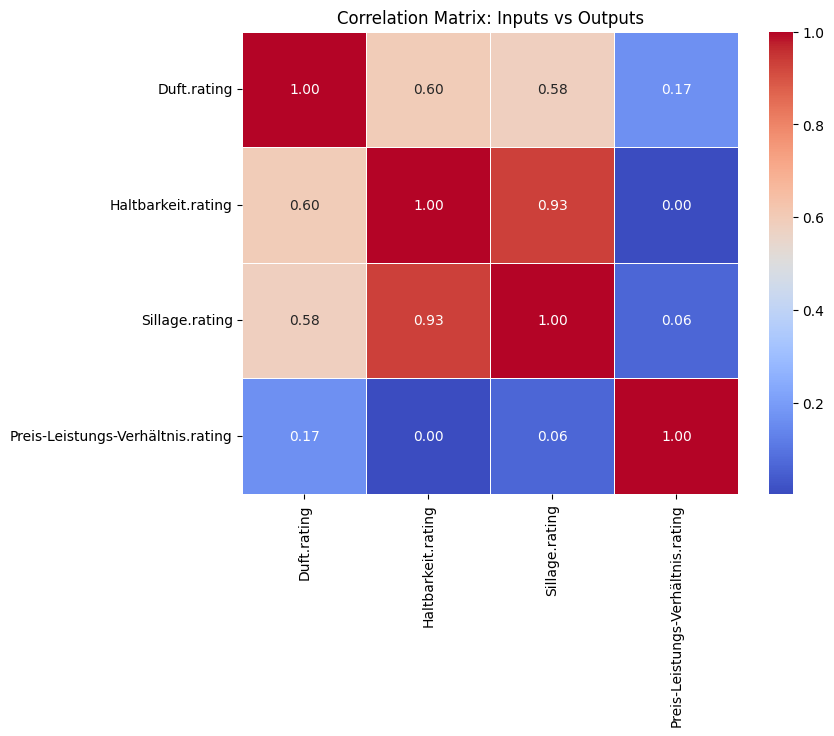

In [ ]:
input_cols = ["Duft.rating", "Haltbarkeit.rating", "Sillage.rating", "Preis-Leistungs-Verhältnis.rating"]
# output_cols = ["Duft.rating", "Haltbarkeit.rating", "Sillage.rating", "Preis-Leistungs-Verhältnis.rating"]
# Compute correlations between inputs & outputs
# correlation_matrix = df_encoded[input_cols + output_cols].corr()
correlation_matrix = df_encoded[input_cols].corr()

# Extract correlations between inputs and outputs
correlation_matrix = correlation_matrix.loc[input_cols, output_cols]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix: Inputs vs Outputs")
plt.show()

/var/folders/lq/blpghcxd0b9cm2tsrvlqq9g40000gn/T/ipykernel_3588/1519883123.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


KeyboardInterrupt: 

In [128]:
result = df_encoded[(df_encoded['Duft.rating'] > 8.0) & 
                    (df_encoded['Haltbarkeit.rating'] > 7.7) &  
                    (df_encoded['Frisch'] > 20) &  
                    # (df_encoded['Rose'] == 1) &  
                    # (df_encoded['Safran'] == 1) &  
                    # (df_encoded['Oud'] == 1) &  
                    (df_encoded['Duft.number_of_ratings'] > 99)
                    ].sort_values(by='Duft.rating', ascending=False).head(10)
result = result[['name', 'brand', 'top_notes', 'middle_notes', 'base_notes', 'all_notes', 'url', 'Duft.rating', 'Haltbarkeit.rating', 'Sillage.rating']]
result

name                     brand                                                                          top_notes                                                                              middle_notes  \
3081                                                         Ginger         Widian  AJ Arabia                                         [Ingwer, Bergamotte, Paradisone®, Zitrone]                                                              [Magnolie, Veilchen, Hedion]   
967                                                     Imagination             Louis Vuitton                                                                               None                                                                                      None   
2241                    Elysium pour Homme Roja Parfums 2017 Parfum              Roja Parfums  [Grapefruit, Limette, Artemisia, Bergamotte, Lavendel, Moschus, Thymian, Zitrone]                     [Schwarze Johannisbeere, Grasse-Jasmin, Mairose, Apfel, Maiglöckchen]   
709                     Isola Blu Oligarch Roja Parfums 2022 Parfum              Roja Parfums                                  [Limette, Bergamotte, Lavendel, Thymian, Zitrone]  [Schwarze Johannisbeere, Champaka, Orangenblüte, Apfel, Grasse-Jasmin, Kokosnuss, Lilie]   
11765                                                         Basso                   Sospiro                                                                       [Grapefruit]                                                                   [Gartennelke, Labdanum]   
3812                                                       Vendetta              Marc Gebauer                                      [Eisen, Safran, Zitrone, Gewürznelke, Orange]                                               [Orangenblüte, Lavendel, Muskatellersalbei]   
9829                                                  Black Panther     Alexandria Fragrances                                                                               None                                                                                      None   
1023   Amyris Homme Maison Francis Kurkdjian 2019 Extrait de Parfum  Maison Francis Kurkdjian                                                                               None                                                                                      None   
7146                                               Le Gemme - Tygar                   Bvlgari                                                                               None                                                                                      None   
3928                                                       Sealight             MAD Parfumeur           [Zitrone, Ananas, Grapefruit, Mandarine, Apfel, Ingwer, Szechuanpfeffer]                                                                   [Freesie, weiße Blüten]   

                                                                                                                                                          base_notes  \
3081                                                                                                                                 [Ambrox, Sandelholz, Patchouli]   
967                                                                                                                                                             None   
2241                                        [Vetiver, Wacholderbeere, Zedernholz, Ambra, Benzoe, Cypriol, Galbanum, Labdanum, Moschus, rosa Pfeffer, Leder, Vanille]   
709    [Wacholderbeere, Eichenmoos, Gras, Patchouli, Zedernholz, Amber, Ambra, Anis, Birke, Galbanum, Iris, Leder, Mate, Moschus, rosa Pfeffer, Vanille, Tonkabohne]   
11765                                         [Guajakholz, Sandelholz, Selleriesamen, Vetiver, Zeder, Eichenmoos, Galbanum, Muskat, rosa Pfeffer, schwarzer Pfeffer]   
3812                                                                                